# Milestone 2 

# I. Introduction

### Name    : Gracia Valerine

### Batch   : HCK 017

### This program is build to predict the price of houses based on the datas that has been gathered in this data.
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# II. Background

This program is designed to predict the price of houses based on data that has been collected. Accurate house price prediction is crucial for various stakeholders in the real estate market, including buyers, sellers, and investors. By leveraging historical data, we can identify patterns and trends that influence house prices.

Using this data, the program will employ statistical and machine learning techniques to build a model that can predict house prices based on the given features. The goal is to provide accurate and reliable predictions to aid in making informed decisions in the real estate market.

# A. Import Libraries

In [2]:
# Import Library

#Dataframe
import pandas as pd

# Numerical Data
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Machine Learning Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Outlier Handling
from feature_engine.outliers import Winsorizer

# Correlation
from scipy.stats import pearsonr, spearmanr

# Save Model
import pickle
import json

# B. Data Loading

In [3]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


First of all, we will put the data onto a variable, in this case df for the program to load.

In [4]:
# Show the first 10 data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


These are the first 10 entries of the data. This will show us a base understanding to the data that we will process. Other than that, we can check the consistency of the data along with pattern to see for obvious errors.

In [5]:
# Show last 10 data
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


These are the last 10 entries of the data. From this we could get a grasp of understanding of the data and check abnormalitys in the pattern of the data. Since, there might be incomplete data and/or problems with loading the data.

In [6]:
# Show information about the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Based on the information given by the data, there are 21 columns with 21613 entries. These data have different types of data, starting from string or object to float to integer type of data. Which means that we will have to differenciate between numerical data and categorical data. The columns include:

1. id: Unique identifier for each house (integer)

2. date: Date when the house was sold (object)

3. price: Sale price of the house (float)

4. bedrooms: Number of bedrooms (integer)

5. bathrooms: Number of bathrooms (float)

6. sqft_living: Square footage of the living area (integer)

7. sqft_lot: Square footage of the lot (integer)

8. floors: Number of floors (float)

9. waterfront: Whether the house has a waterfront view (integer)

10. view: Quality of the view from the house (integer)

11. condition: Condition of the house (integer)

12. grade: Overall grade given to the housing unit, based on King County grading system (integer)

13. sqft_above: Square footage of the house apart from the basement (integer)

14. sqft_basement: Square footage of the basement (integer)

15. yr_built: Year the house was built (integer)

16. yr_renovated: Year the house was renovated (integer)

17. zipcode: Zip code of the house (integer)

18. lat: Latitude coordinate of the house (float)

19. long: Longitude coordinate of the house (float)

20. sqft_living15: Living room area (integer)

21. sqft_lot15: Lot area (integer)

In [7]:
# Show data with missing value
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

From the data above, there seems to be no missing value, therefore handling missing value step can be skipped. With the non-existence of missing value, we wont have to lose some datas nor having to fill data with different values from the real case. This can minimalize the inaccurate data or the decreasing of the data size. 

In [8]:
# Dropping the 'id' and 'date' columns
df.drop(['id', 'date'], axis=1, inplace=True)

The id and date columns will be deleted since these data are unnecessary for our model to predict price. This will save us the trouble later on in computing time for the model. 

# C. Exploratory Data Analysis (EDA)

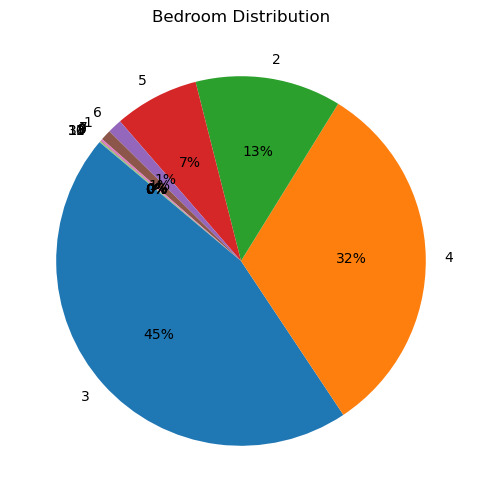

In [9]:
#Visualize Pie Chart
bedrooms_counts = df['bedrooms'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(bedrooms_counts, labels=bedrooms_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Bedroom Distribution')
plt.show()

Based on the chart that is shown, 45% of the house sales are 3 bedroom houses, 32% of the house sales are 4 bedroom houses, 13% of the house sales are 2 bedroom houses, and 7% of the houses are 5 bedroom houses. This shows that most people are in need and/or likes 3-4 bedroom houses. With this information, business can focus their marketing, development, and sales strategies on these types of homes to cater to the majority of the market while also creating strategies to target buyers interested in larger homes. Other than that, business could manage their iventory by limiting the less in demand houses for a more optimalized business venture.

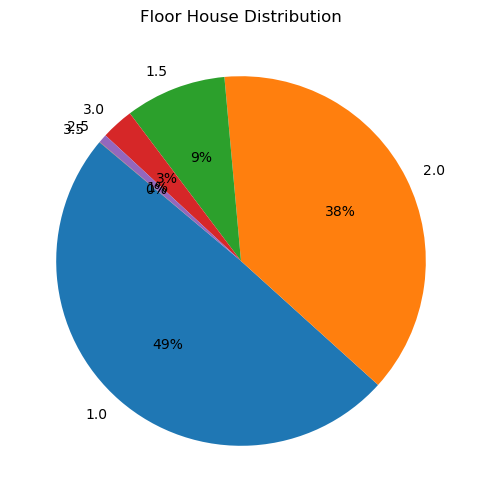

In [10]:
#Visualize Pie Chart
floors_counts = df['floors'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(floors_counts, labels=floors_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Floor House Distribution')
plt.show()

Based on the chart that we see, 49% of the houses have 1 floor only, 38% of the houses that are sold have 2 floors, 9% of the houses have 1 and a half floor. Based on this data, we know that most people chooses houses with 1 - 2 floors. Therefore, businesses can allocate resources more effectively by focusing on single and two-floor homes, where the demand is highest. Also, potentialize niche for houses with 1.5 floor and limit market on houses with more than 2 floors.

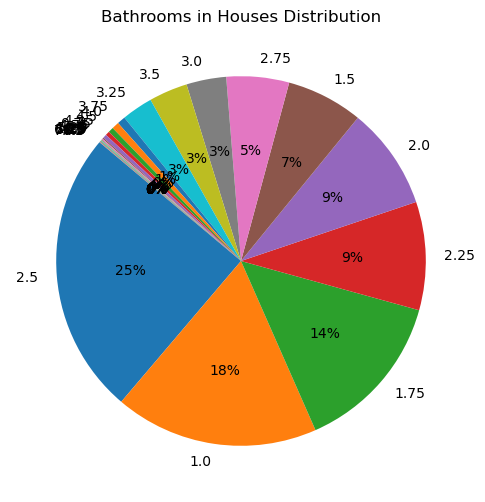

In [11]:
#Visualize Pie Chart
bathrooms_counts = df['bathrooms'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(bathrooms_counts, labels=bathrooms_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Bathrooms in Houses Distribution')
plt.show()

Based on the chart shown, the majority of the sales which is 25% of the houses have 2.5 bathrooms. There are 18% of the houses with 1 bathroom, 14% of the sales houses with 1.75 bathrooms, and 9% of sales of houses with 2 bathrooms. This states that people often bought houses with 1 to 2.5 bathrooms. Which means, business can take another step in marketing houses with less than 3 bathrooms. The won't have to hesitate allocating resources to pursue specific marketing strategy. Though, business could also improve niche in selling houses with more than 2 bathroom, but with limited stock.

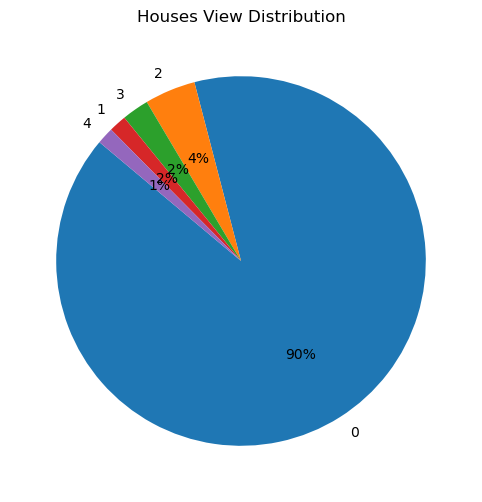

In [12]:
#Visualize Pie Chart
view_counts = df['view'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(view_counts, labels=view_counts.index, autopct='%.0f%%', startangle=140)
plt.title('Houses View Distribution')
plt.show()

Based on the chart that we see, 90% of the houses sales, which are the majority have no views. This greatly shows that most people doesn't seem to care if the house have a great view or not, but rather in the functionality of the house. Business should focus in marketing houses by funtionality rather than aesthetics. Yes, aesthetically pleasing and strategic location can be plus point in sales, but we need to cater sles to customers preference rather than our own.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


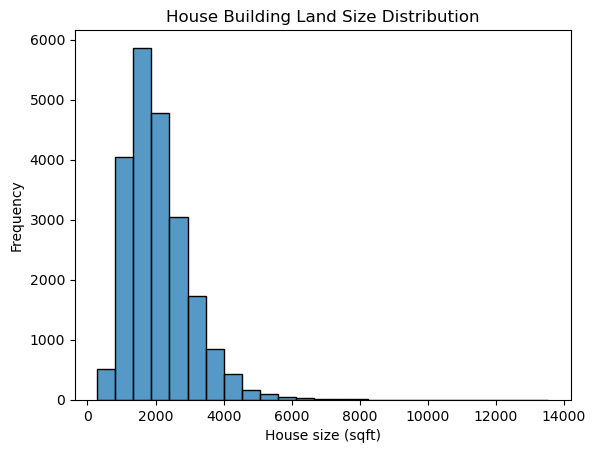

In [13]:
#Visualize Histoplot
sns.histplot(df['sqft_living'], bins=25)
plt.title('House Building Land Size Distribution')
plt.xlabel('House size (sqft)')
plt.ylabel('Frequency')
plt.show()

Based on the data that we see, the majority of houses fall within the 1,000 to 3,000 square feet range of living room, with the peak frequency around 2,000 square feet. This shows that most of the houses that are in demand are houses within 2000 square feet in living room. Businesses could focus in selling medium-sized homes. Since what we see that the graph is more skewed to the left, we can say that there are more opportunies in selling the small-sized homes compared to large-sized homes. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


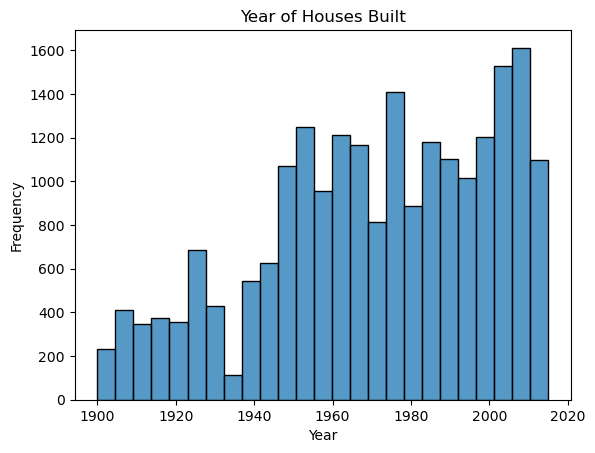

In [14]:
#Visualize Histoplot
sns.histplot(df['yr_built'], bins=25)
plt.title('Year of Houses Built')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

Based on the graph, we see that the houses that are sold are built from 1900s to 2010s. The graph peaked at the year 2000s and 2010s. This means that most people prefer recently built houses compare to older buildings. Business could acquire land to develop it and sell it within short range of time. This recently built building will be leveraged for an optimalized income. Buyers would be more interested in newly developed houses and business team could take advantage of this information to allocate funds for marketing this.

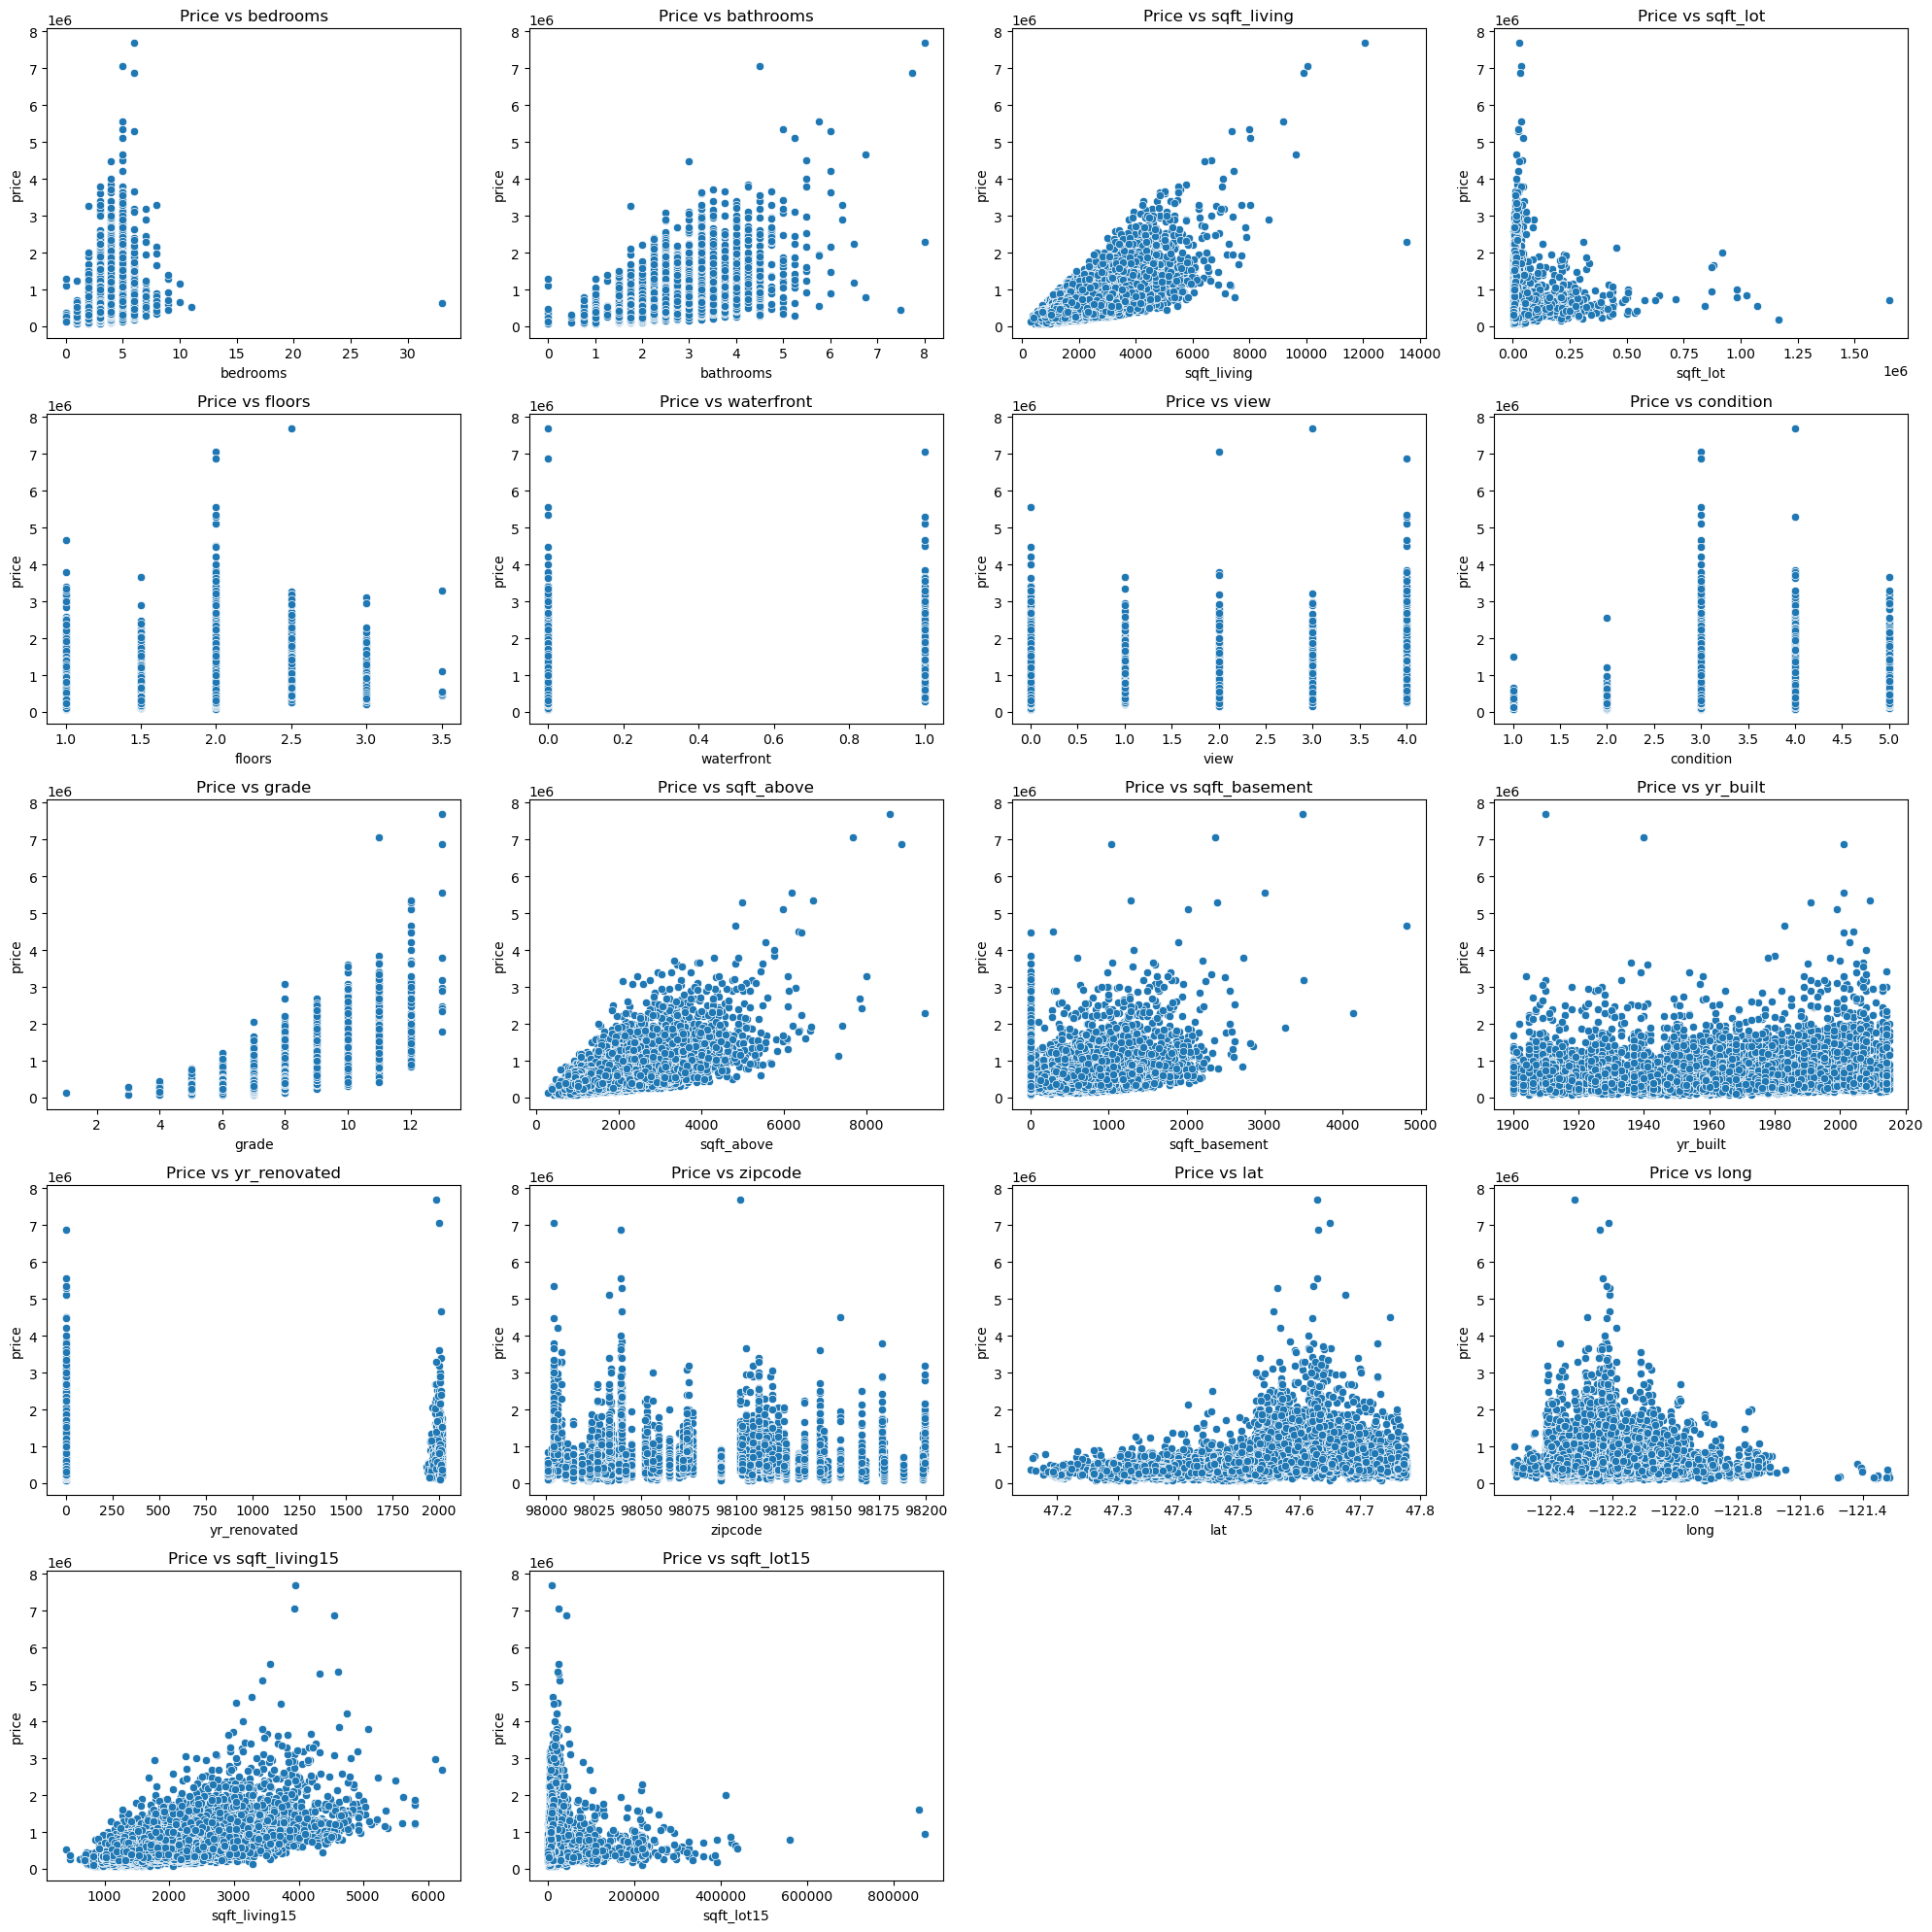

In [51]:
# Define the columns to visualize
columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Create scatterplots
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(x=column, y='price', data=df)
    plt.title(f'Price vs {column}')
plt.tight_layout()
plt.show()

The plot shows the relationship between columns. Based on what we see, some of the columns like sqft_above, sqft_living15, sqft_basement, and sqft_living seems to be somewhat related linearly. The other columns also looks correlated, but not clear in what way. We will see the correlation coefficient to see which columns we are going to use for the model at a later time.

# D. Feature Engineering

### Split Train test

In [15]:
#Defining features and target variable
X = df.drop('price', axis=1)
y = df['price'] #data to be predicted

#Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

The data will be split to train the model and test the model. The column that will be predicted is the price column and the rest will be used as the factors that will affect the change of the price. 

In [16]:
#See train data
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7198,3,2.00,1400,45738,2.0,0,0,4,8,1400,0,1981,0,98070,47.3624,-122.455,2390,56628
3283,4,3.00,2550,5300,2.0,0,0,3,8,1720,830,1908,2013,98117,47.6786,-122.367,1590,4505
1706,4,3.00,3130,2646,2.5,0,0,5,9,2290,840,1906,0,98102,47.6272,-122.316,2920,4500
1426,2,1.50,1320,73600,1.0,0,0,3,7,1320,0,1993,0,98001,47.2755,-122.271,1320,33600
20524,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21194,4,2.50,2301,6452,2.0,0,0,3,9,2301,0,2010,0,98001,47.3460,-122.269,2650,6054
5199,3,2.00,1780,9732,1.0,0,0,3,8,1780,0,1967,0,98040,47.5796,-122.229,1900,10200
18125,3,2.50,1600,3580,2.0,0,0,3,7,1600,0,2000,0,98178,47.4939,-122.261,2020,4327
8243,4,2.75,2660,7389,2.0,0,0,3,9,2660,0,2002,0,98075,47.5993,-121.977,2820,7388


These are the data that will be used to train the data. The factors that will decide the increasement or the decreasement of the price.

In [17]:
#See train target 
y_train

7198      410000.0
3283      855000.0
1706     1265000.0
1426      350000.0
20524     529500.0
           ...    
21194     375500.0
5199      710000.0
18125     292000.0
8243      695000.0
8823      425000.0
Name: price, Length: 17290, dtype: float64

These are the data that will be the target. The model will see these as the target, what should be the answer.

### Outlier Handling

In [18]:
#Selecting categorical and numerical values
cat_val = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
num_val = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

#Show column values
print('Categories: ', cat_val)
print('Numerical: ', num_val)

Categories:  []
Numerical:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


There are no categorical columns in the data. All of the columns are considered numerical. Therefore, we won't be needing to encode any data. We could skip to next part later on. For now, we will check the skewnwess of each column to pick a outlier handling method.

In [19]:
#Creating rows and columns for normal distribution
rows_normal = []
column_normal = []

#Creating rows and columns for skewed distribution
rows_skewed = []
column_skewed = []

#Looping numerical values to filter data distribution
for num in num_val:
    skewness = X_train[num].skew()

    #Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        rows_normal.append([num, skewness])
    
    #Negative Skew
    elif skewness < -1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'High'])

    #Positive Skew
    elif skewness > 1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'High'])

    #Moderate negative Skew
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'Low'])

    #Moderate positive Skew
    elif skewness >= -0.5 and skewness < 1:
        column_skewed.append(num)
        rows_skewed.append([num, skewness, 'Low'])    

The numerical columns will be classified to know the distribution and the skewness of the data.

In [20]:
#Show normal distribution
pd.DataFrame(data=rows_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,bathrooms,0.498561
1,yr_built,-0.468437
2,zipcode,0.413648
3,lat,-0.480605


The id, yr_built, and zipcode columns are actually categorical columns in the form of numbers, which means the outliers handling wont mather to this type of data, but we will still cap the extreme data for a better performance in the model.

In [21]:
#Show skewed distribution
pd.DataFrame(data=rows_skewed, columns=['skew_distribution', 'skewness', 'rate'])

,skew_distribution,skewness,rate
0,bedrooms,2.339146,High
1,sqft_living,1.406404,High
2,sqft_lot,13.409305,High
3,floors,0.614705,Low
4,waterfront,11.314360,High
5,view,3.417824,High
6,condition,1.026857,High
7,grade,0.793173,Low
8,sqft_above,1.430781,High
9,sqft_basement,1.576317,High


These are the data with skewed distribution. Some of the columns like bedrooms, bathrooms, year renovated, grade, etc are actually categorical data with numbers. The outliers handling wont matter to these type of data. We will still cap the outliers for sole purpose of a better model performance.

In [22]:
#Capping method for normal distribution
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

#Fit & Transforming X_train
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

In [23]:
#Capping method for skewed distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed,)

#Fit & Transforming X_train
X_train_capped = winsorizer_normal.fit_transform(X_train_capped)

#Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test_capped)

This part of the code is what limits the extreme values. This will handle how the outlier will be seen. The main function of outlier handling is for ensuring the accuracy and reliability of finding the predicted data. The capping method gaussian is for the normally distributed data and iqr capping method is for the skewed data.

In [24]:
# Plot Distribution Comparison
def outlier_handling_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

The plot that is made is for seeing the difference between before and after handling the outliers.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


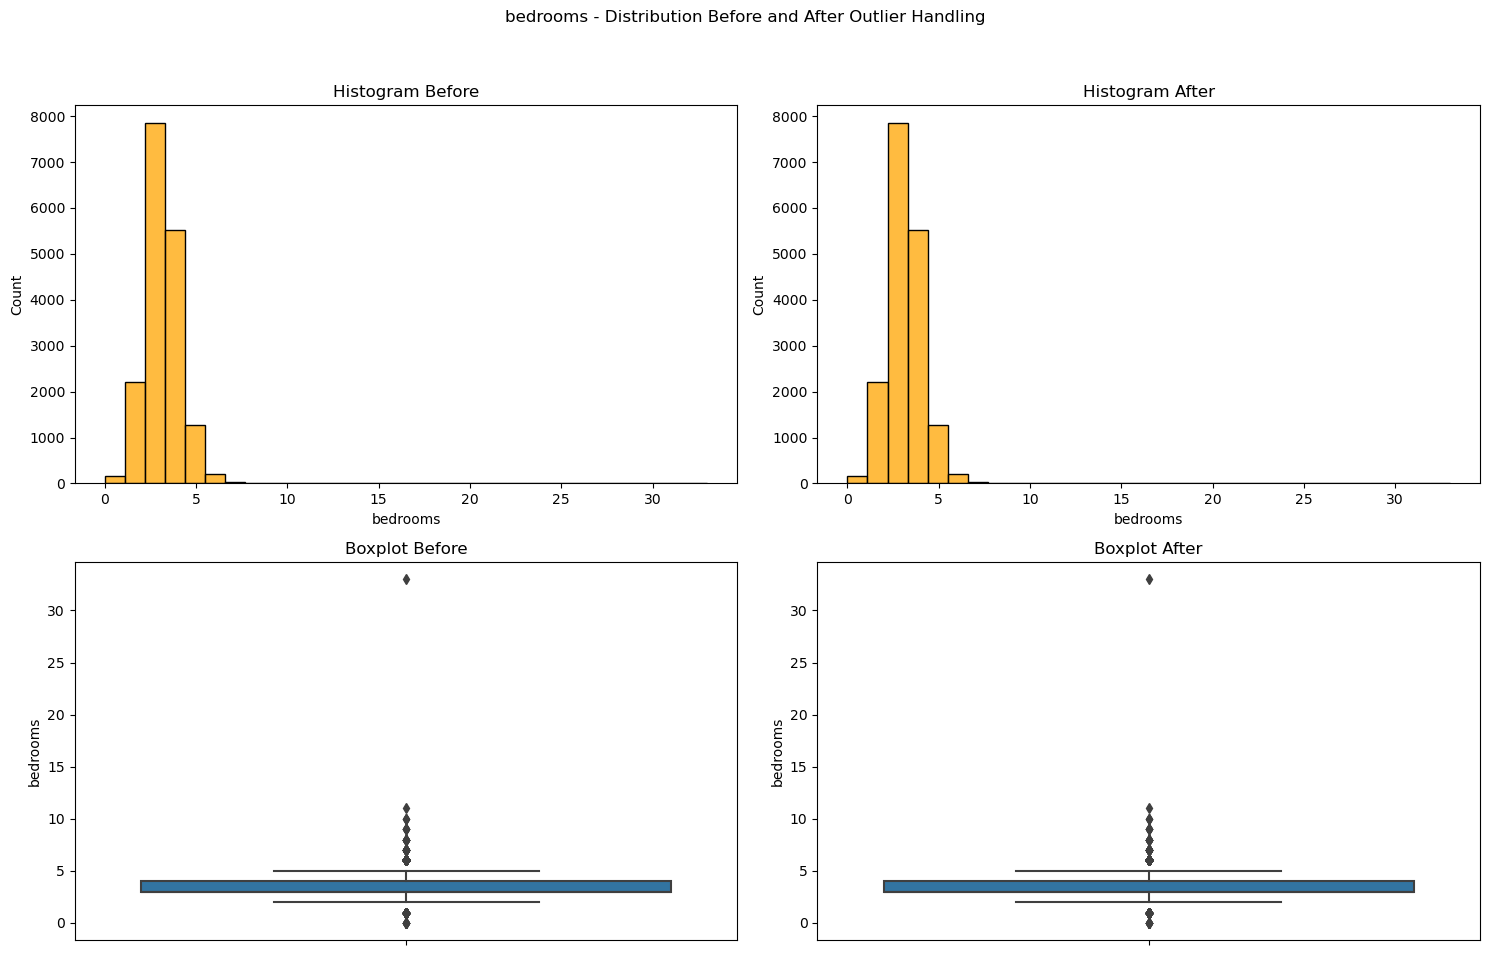

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


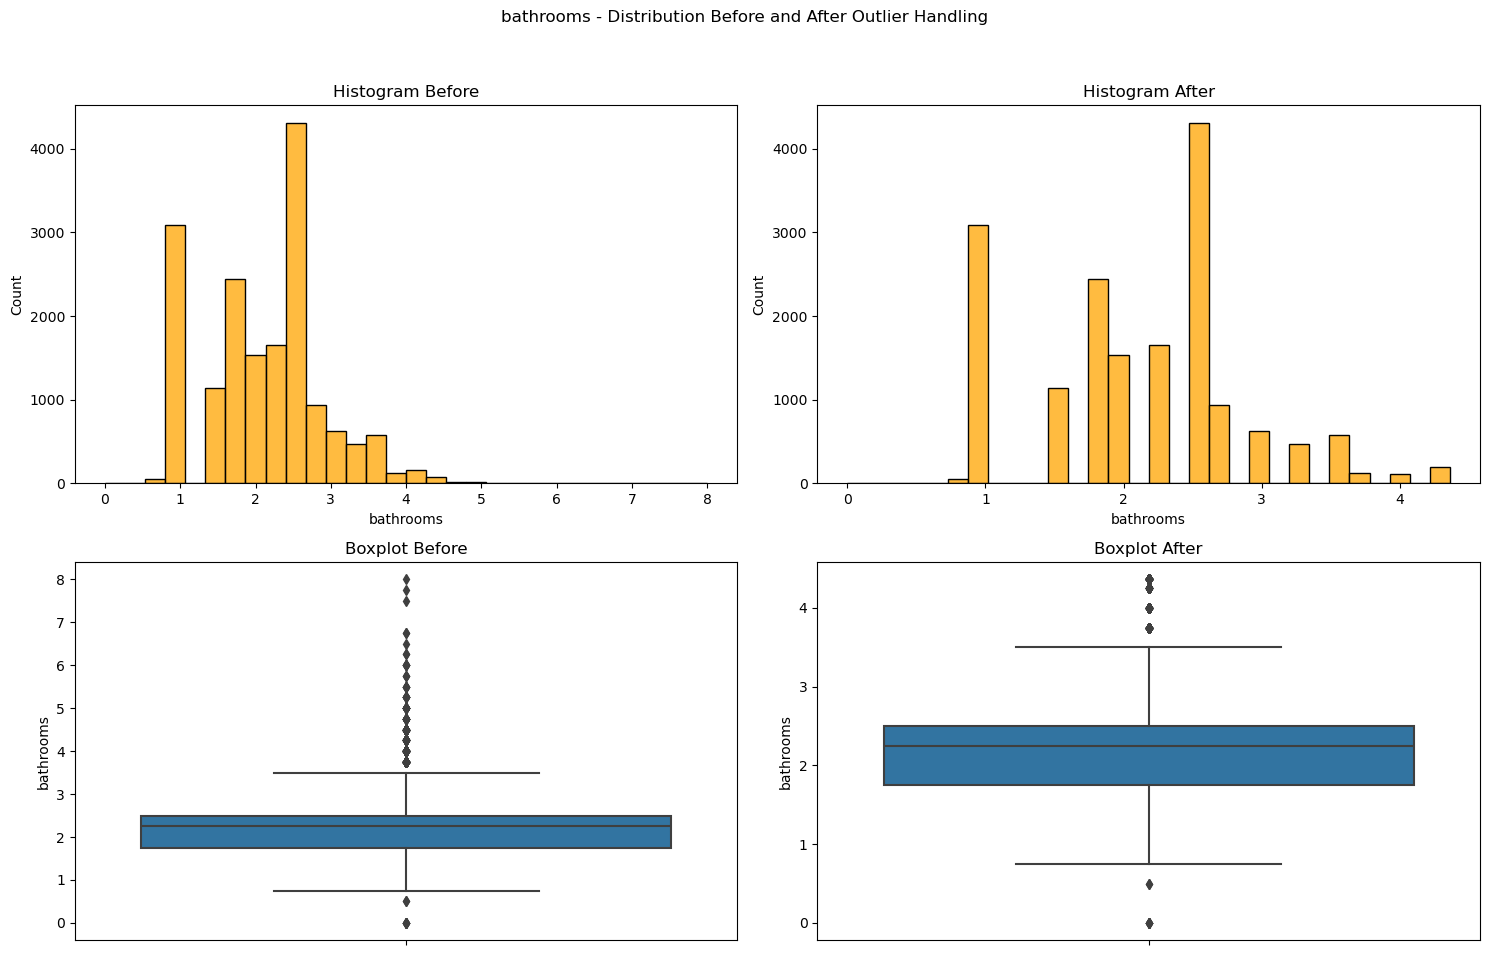

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


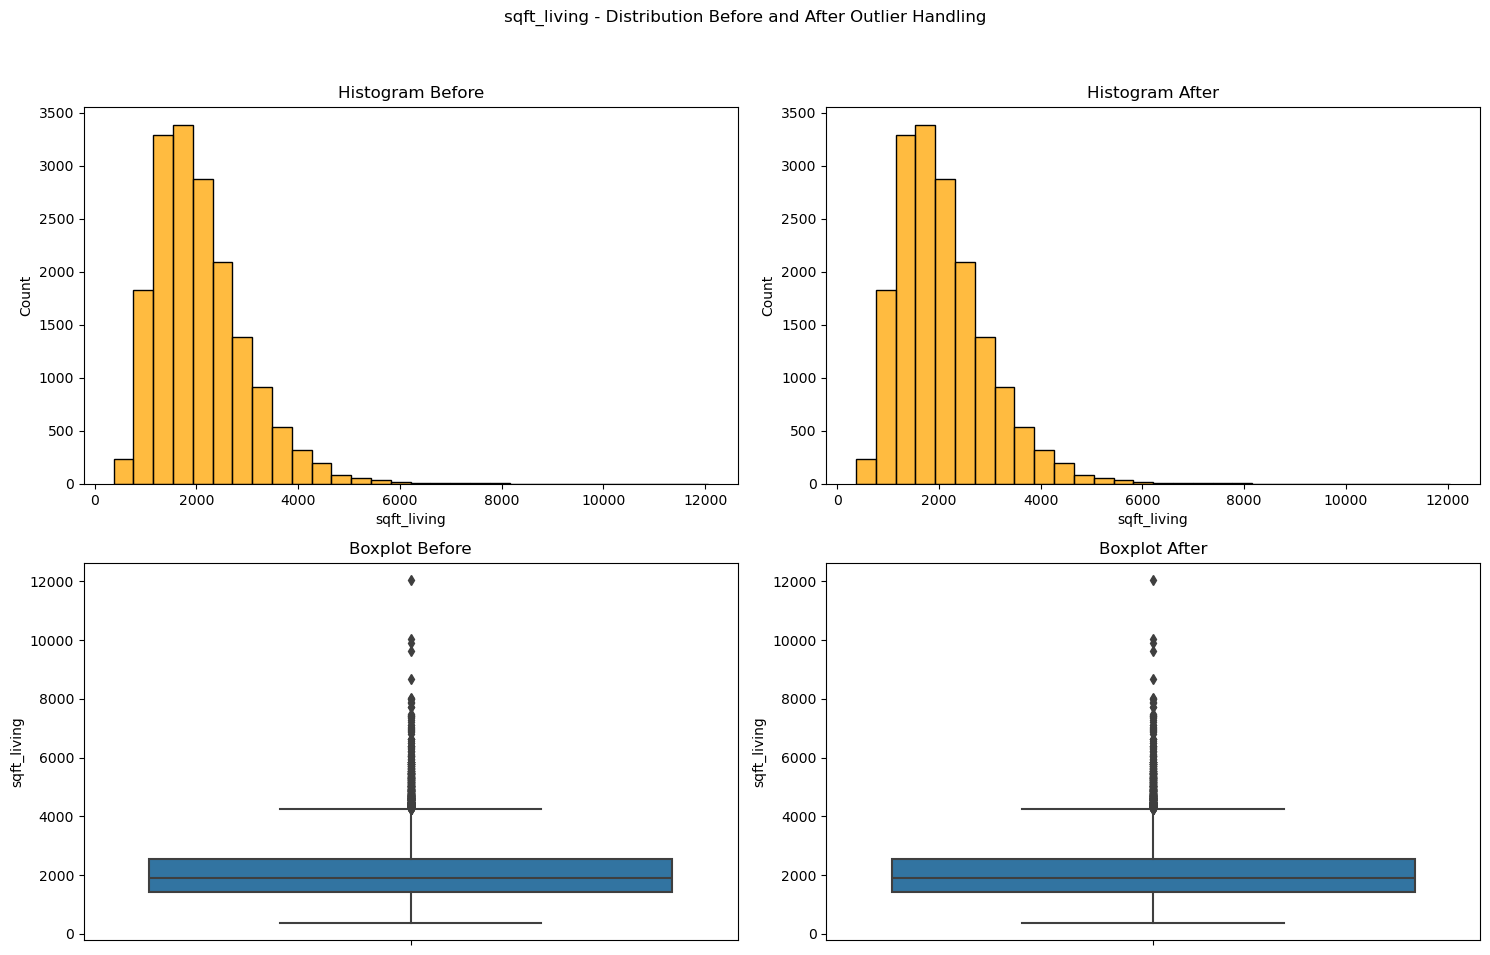

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


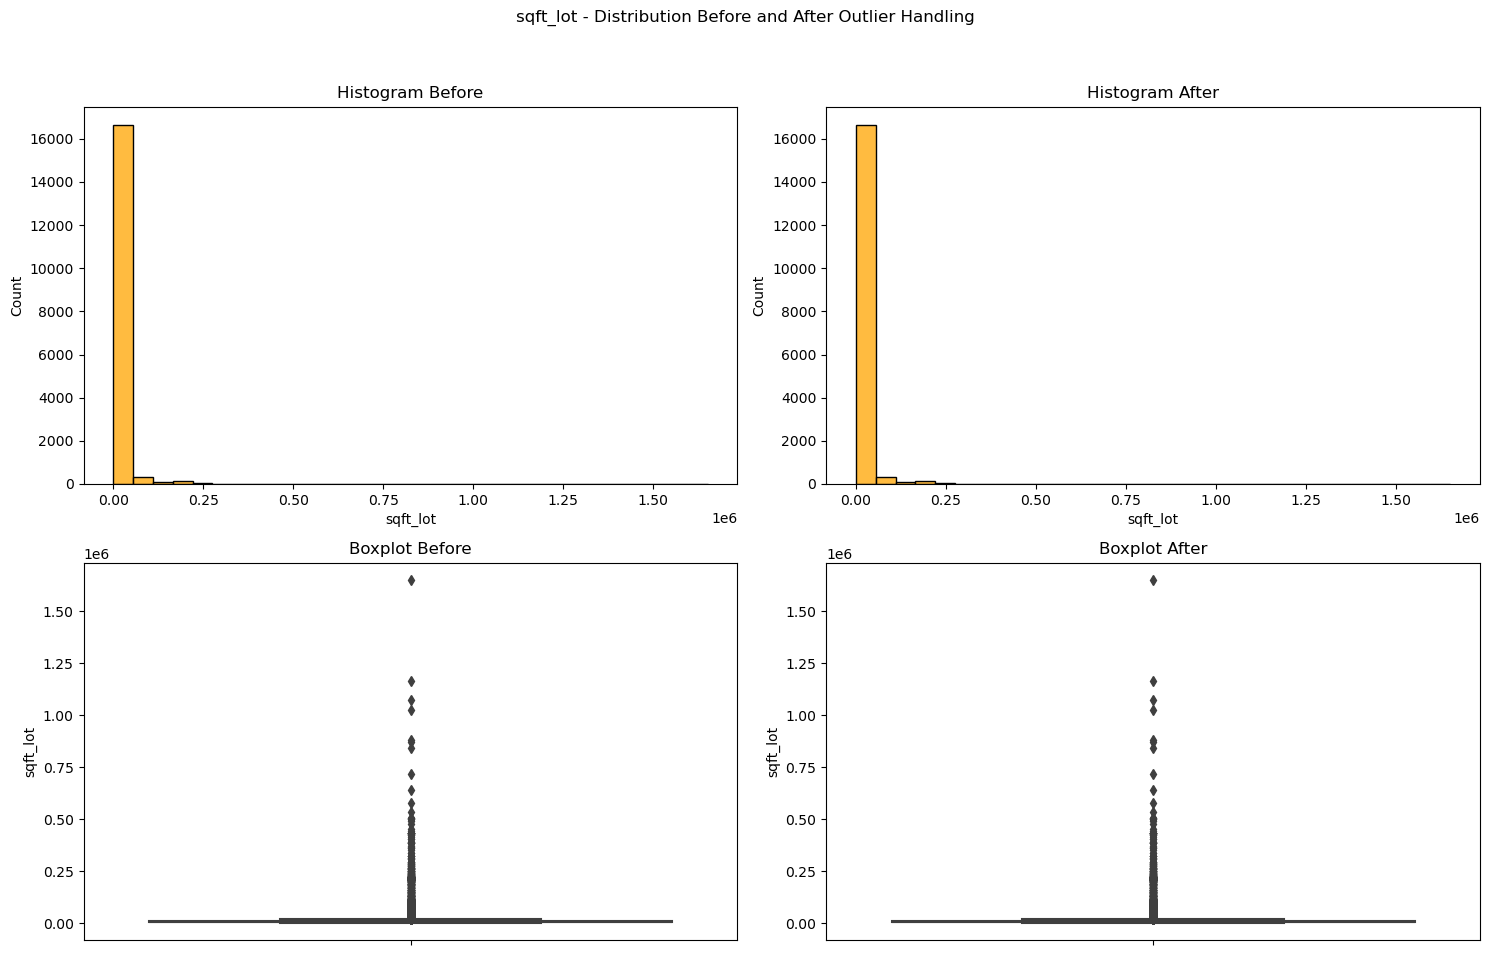

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


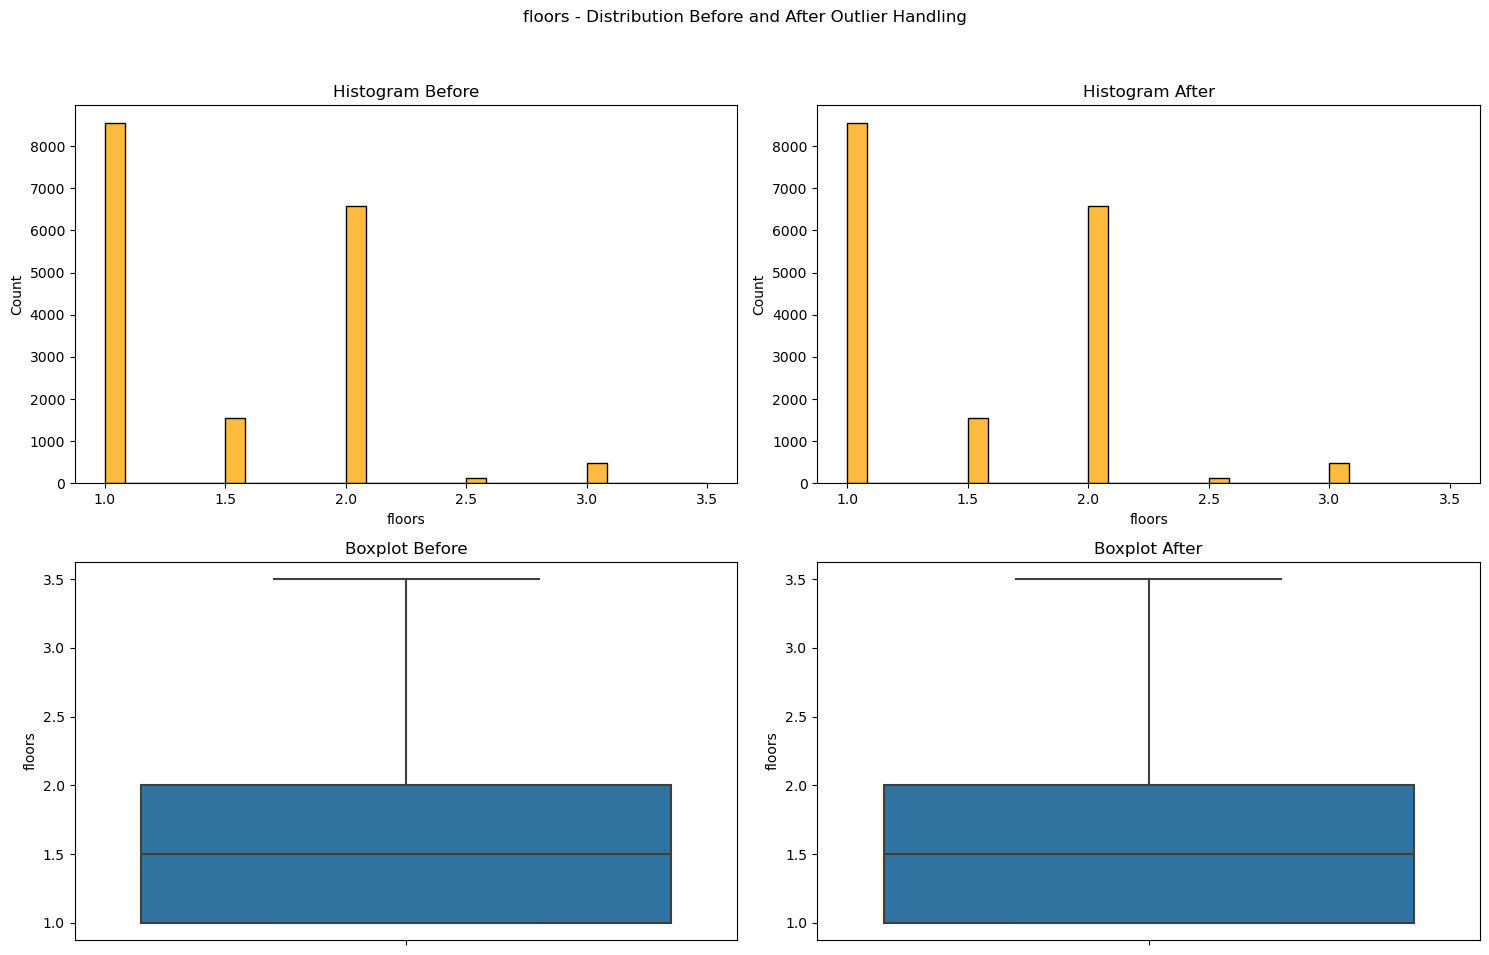

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


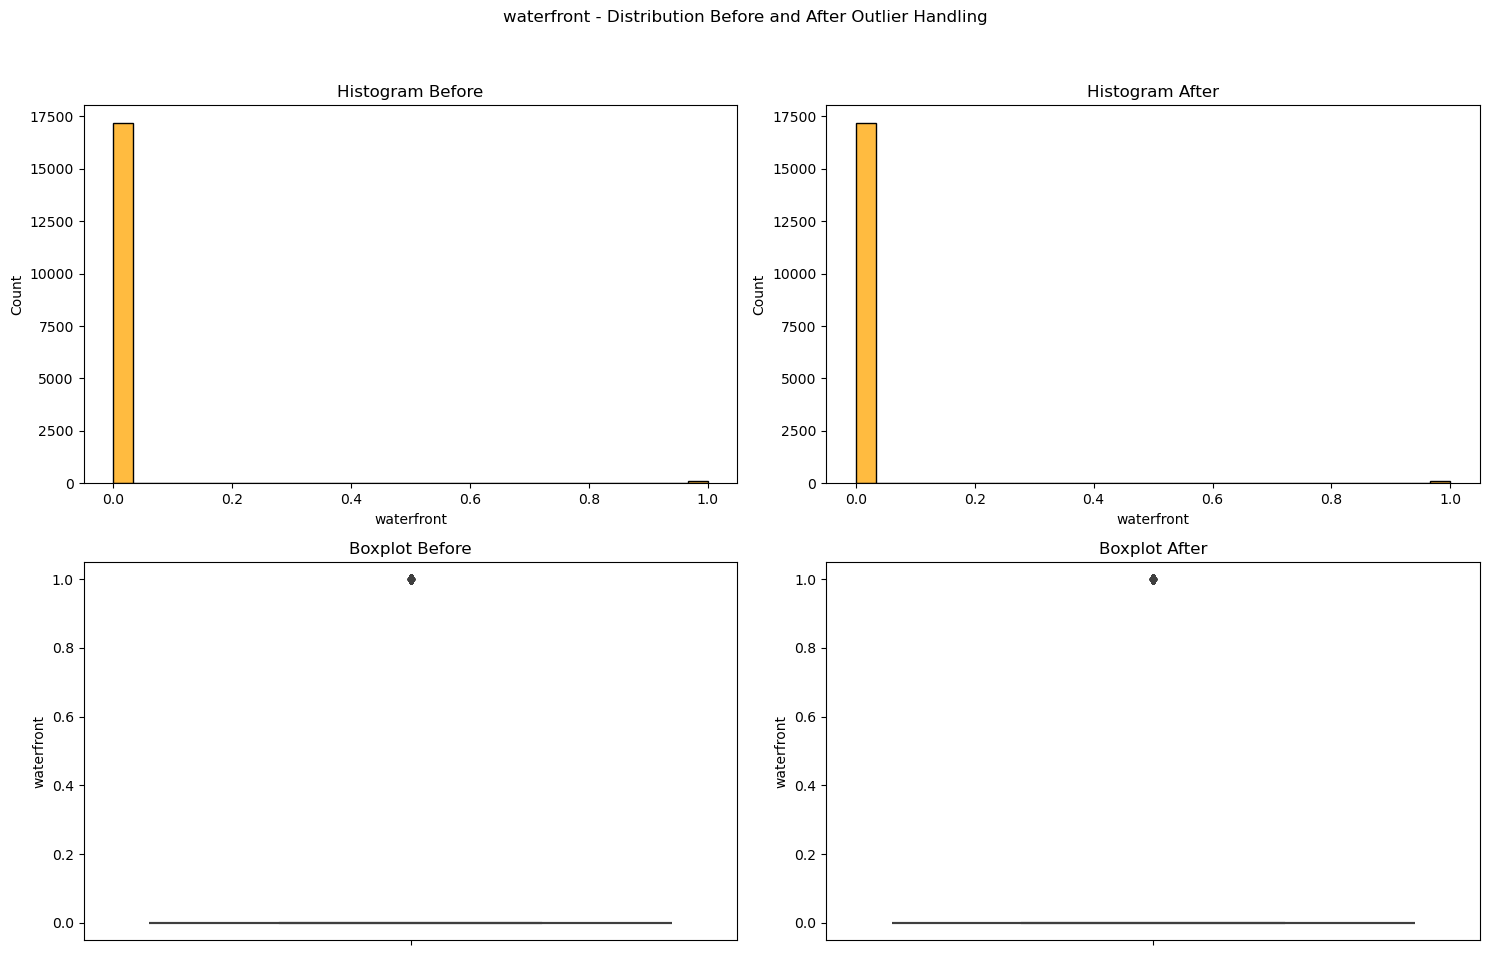

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


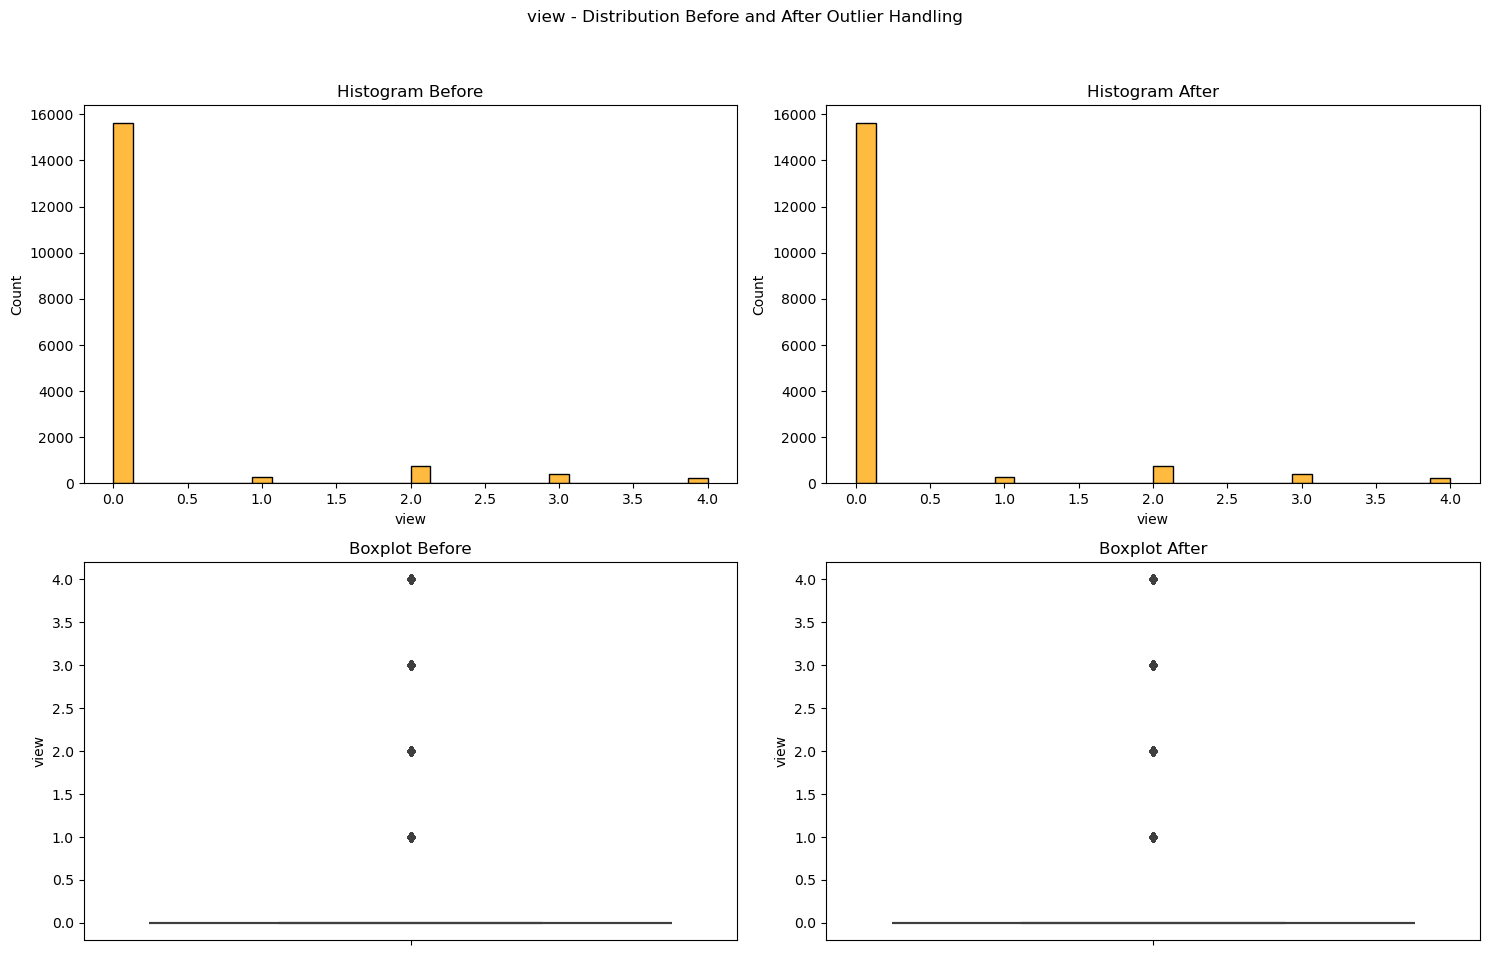

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


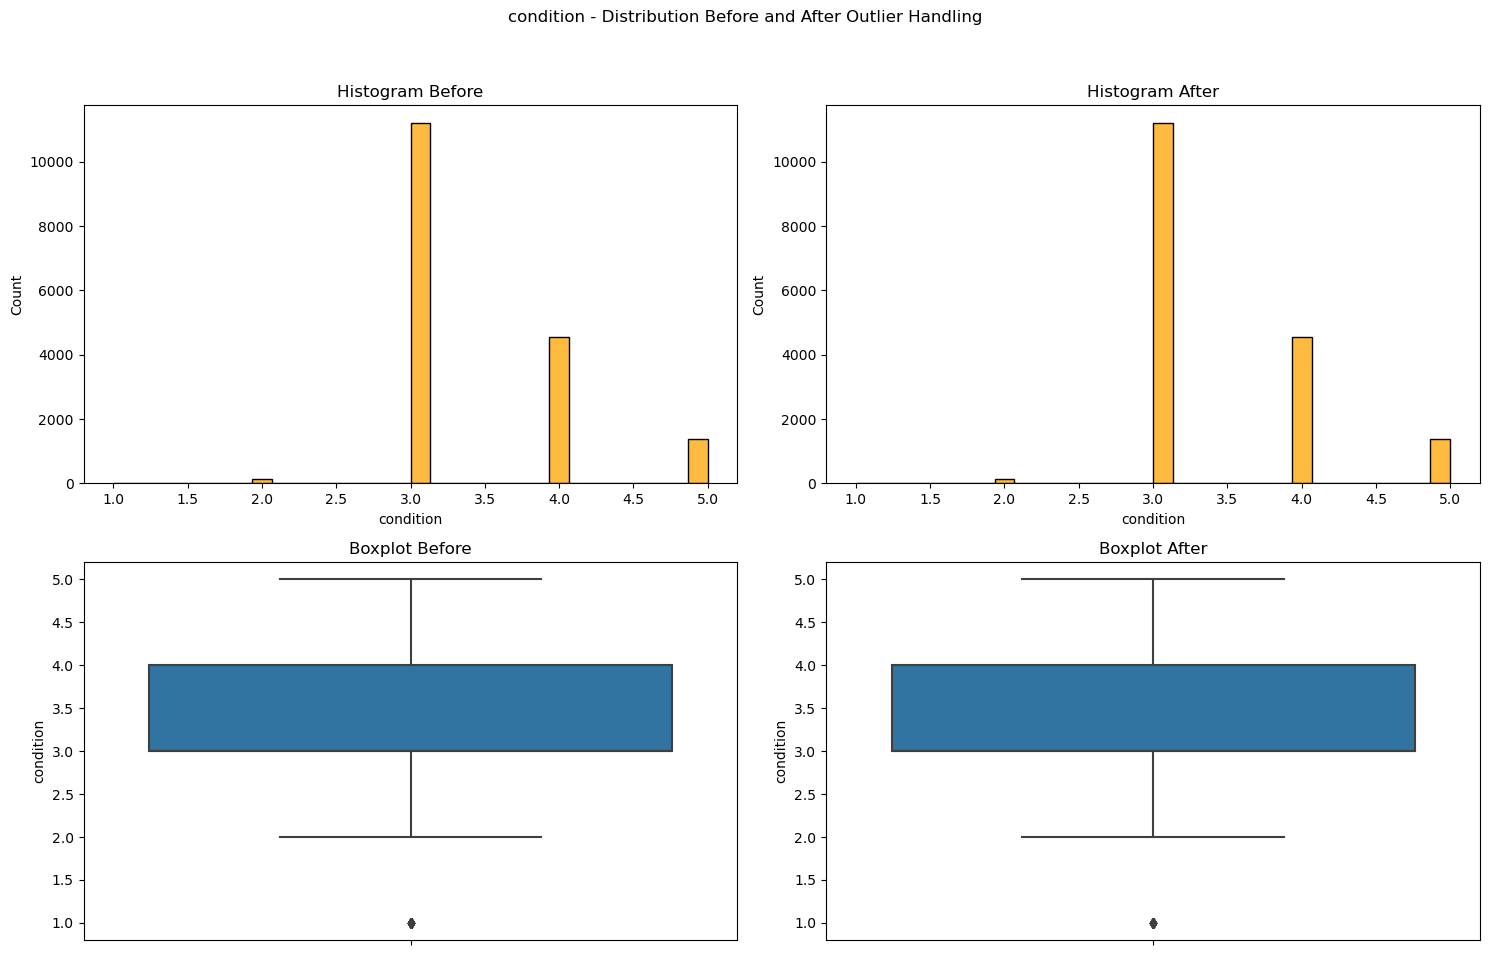

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


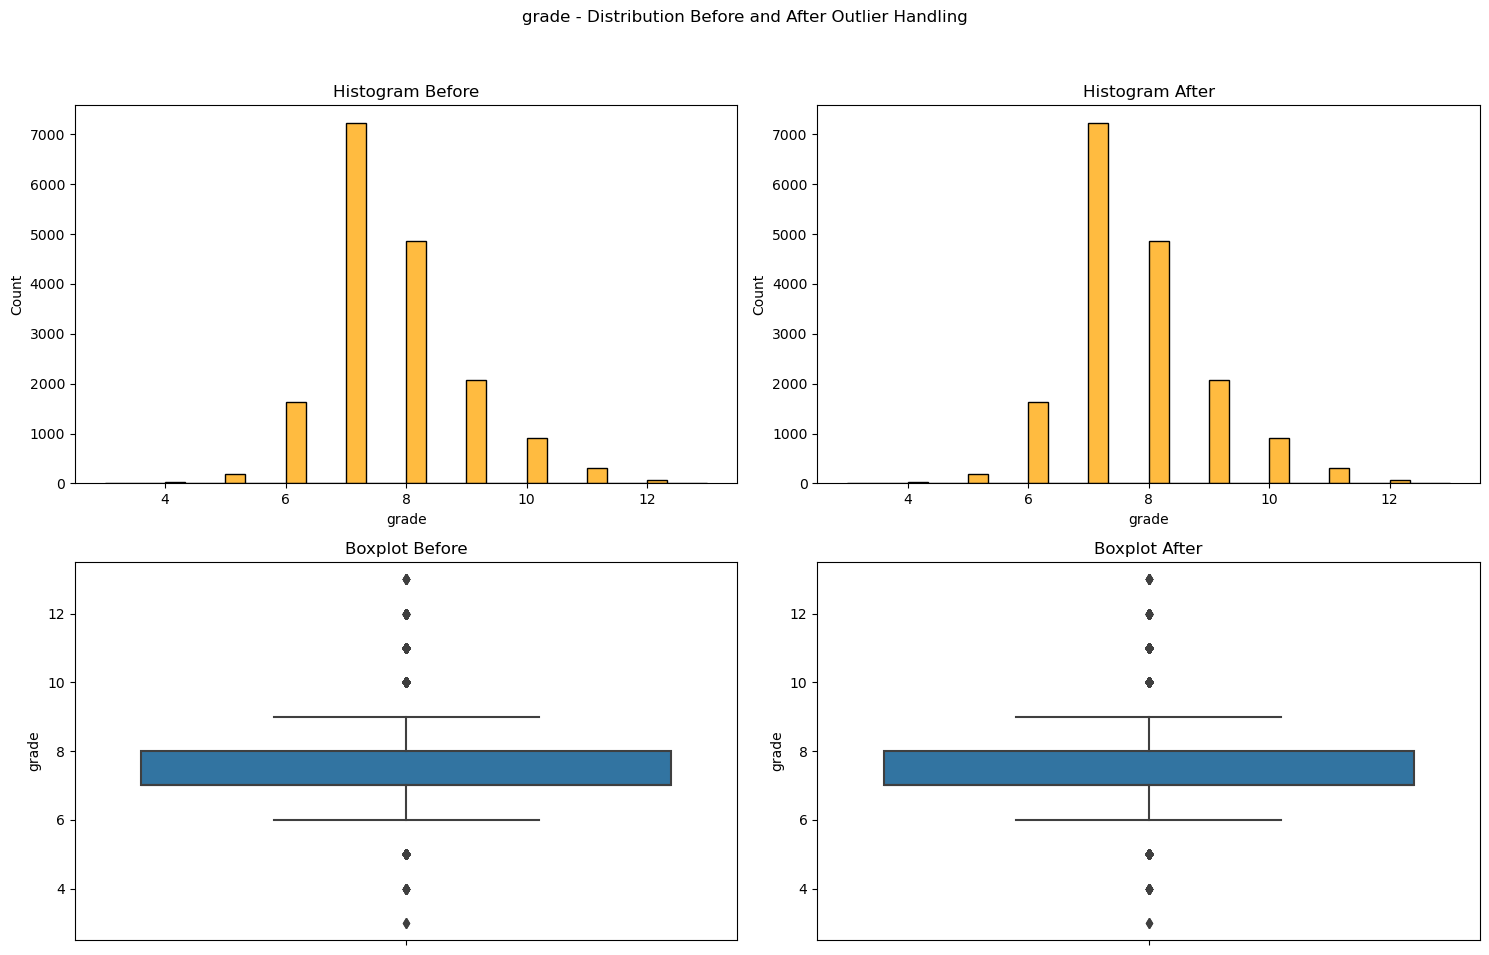

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


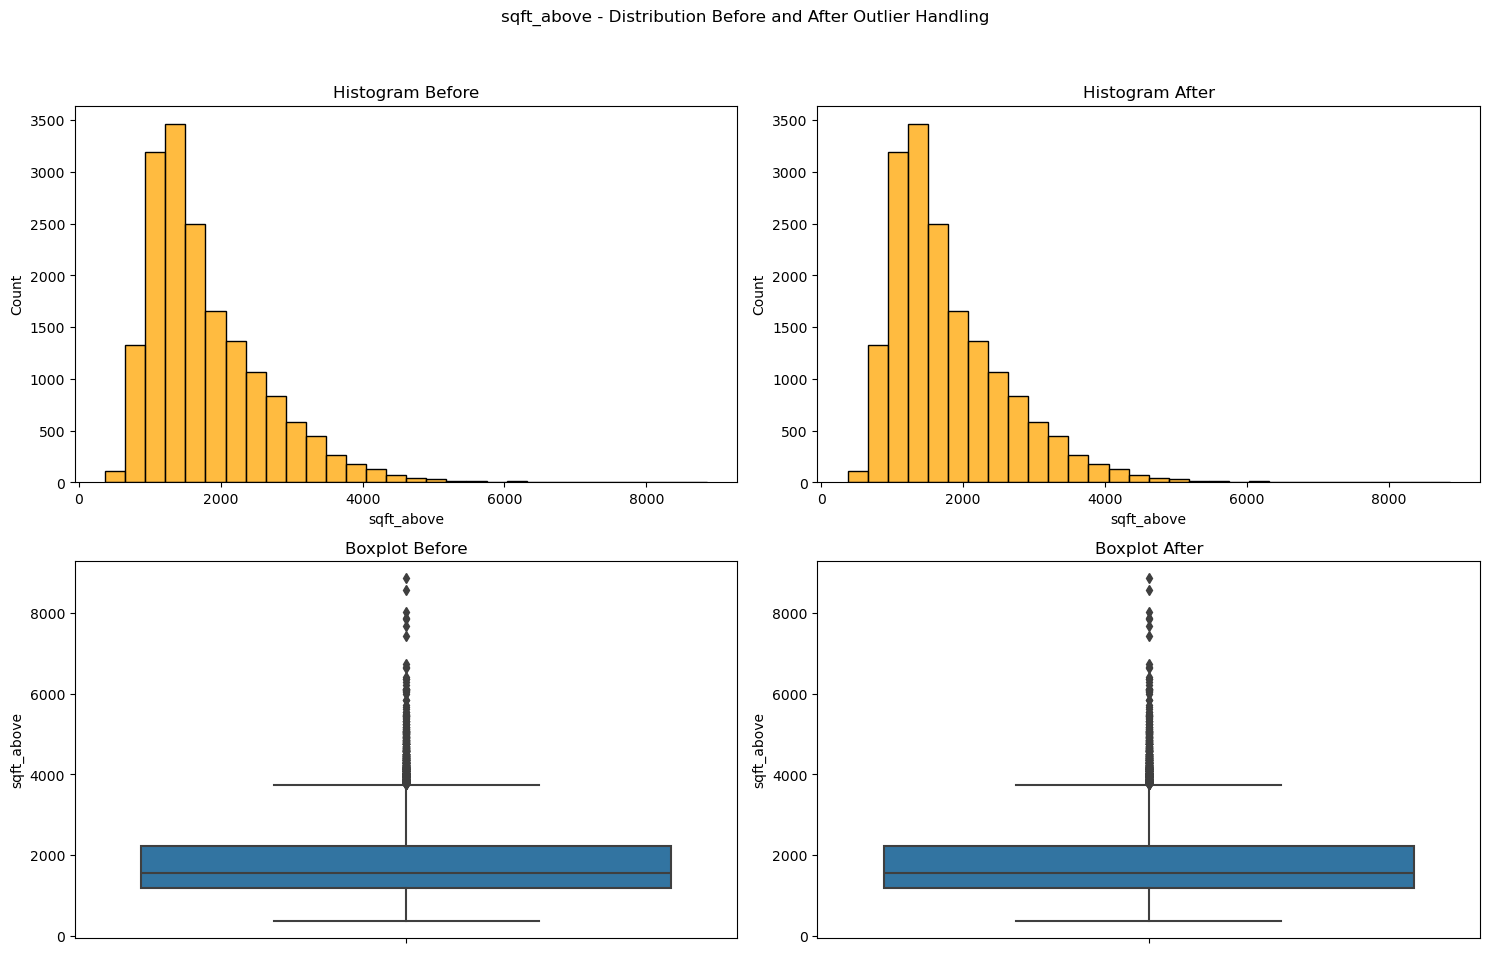

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


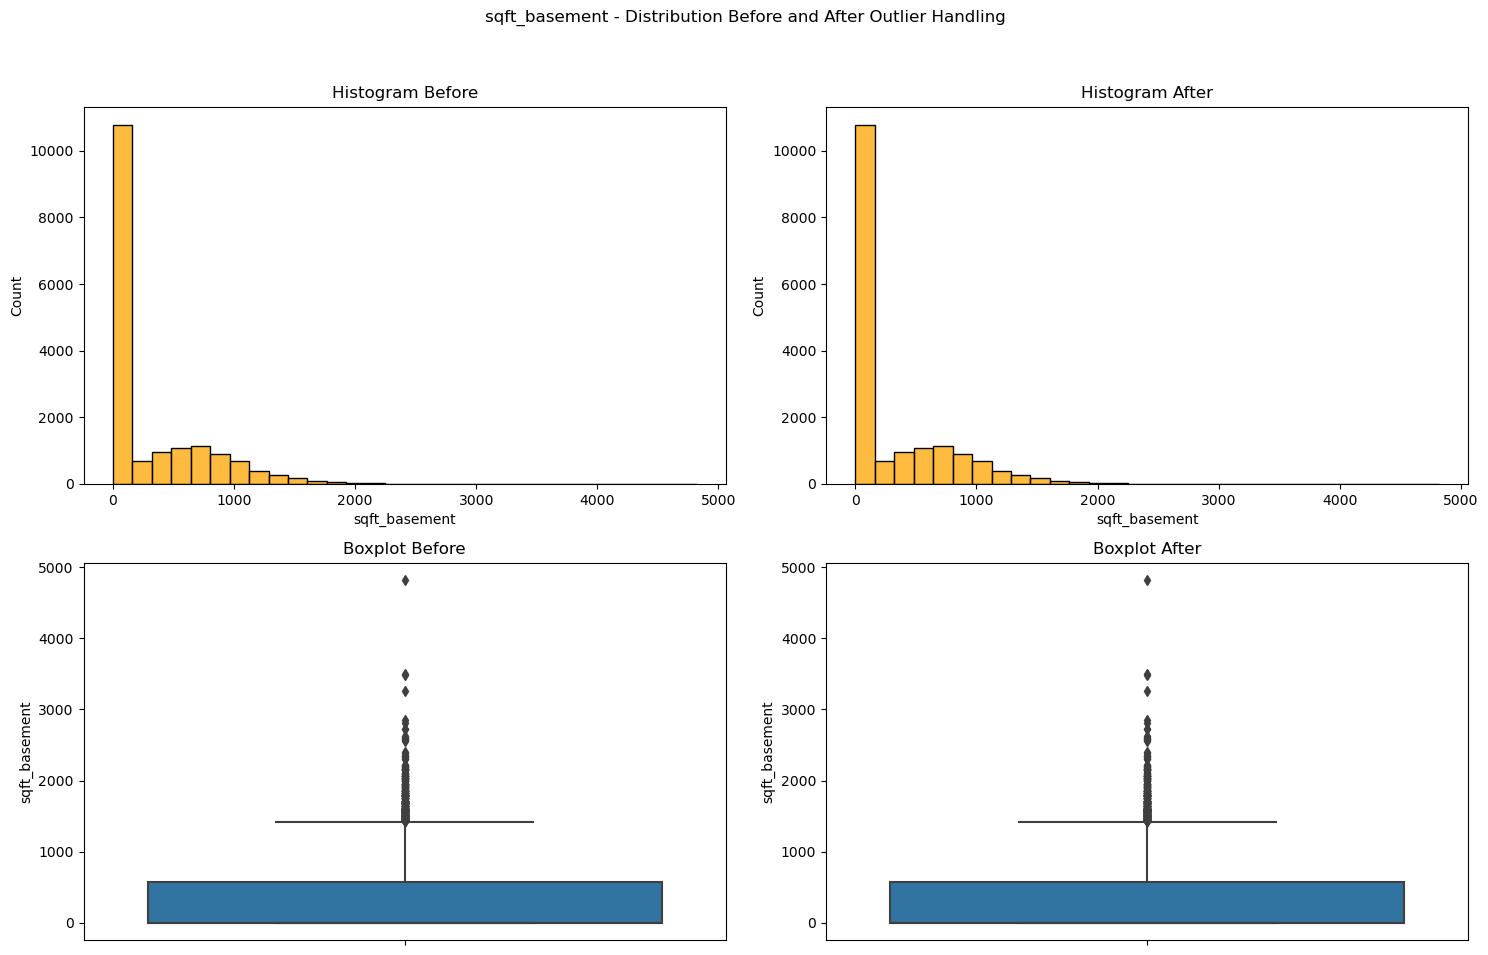

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


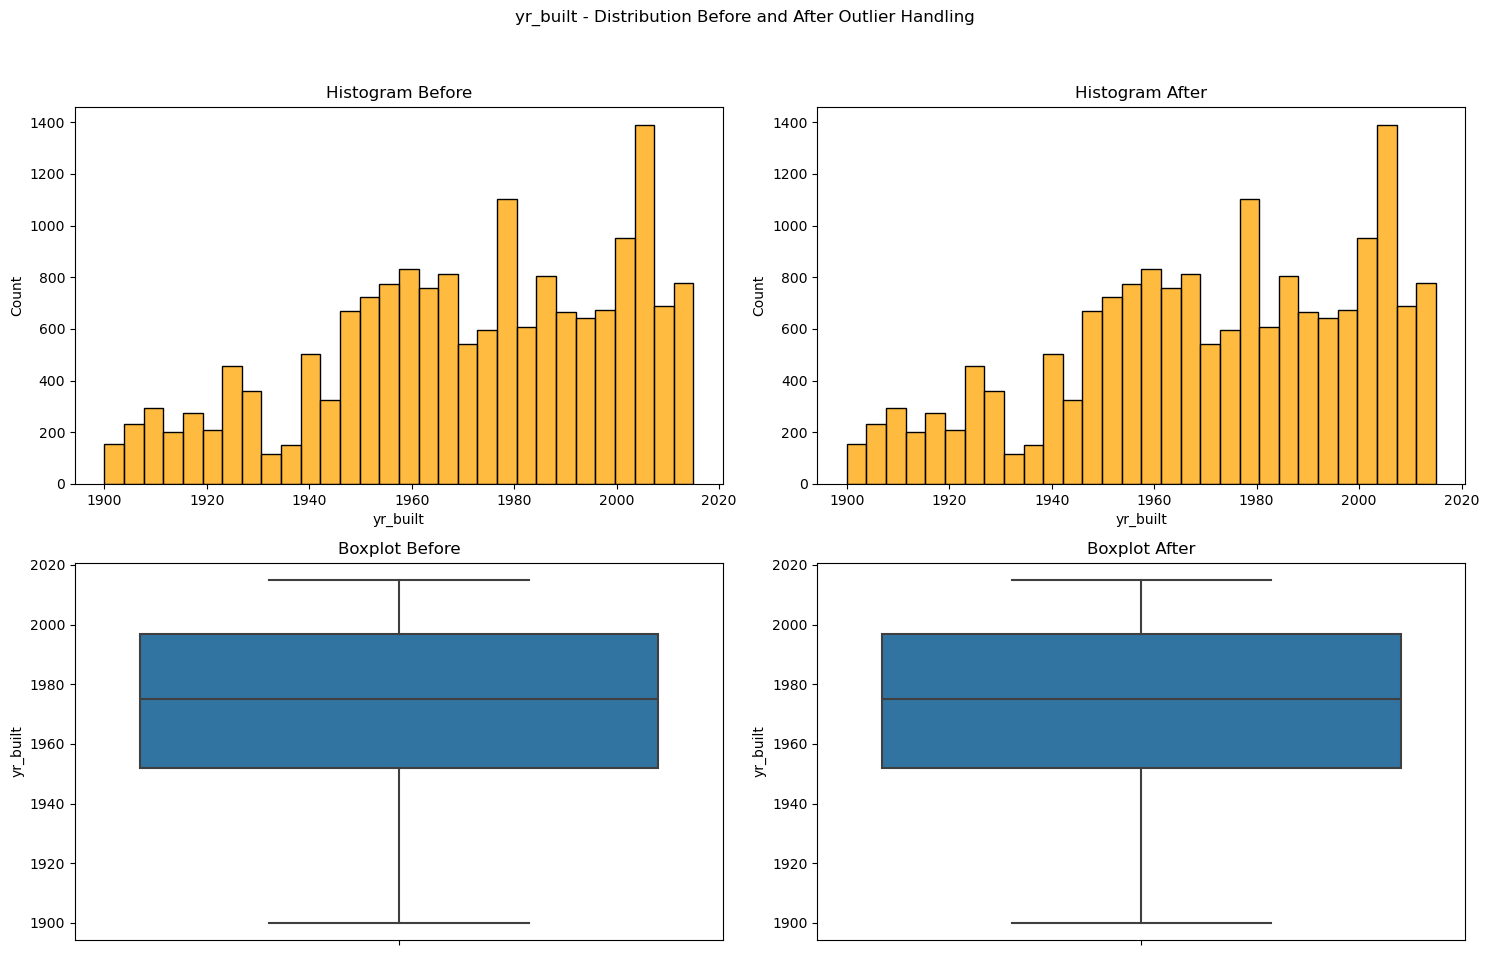

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


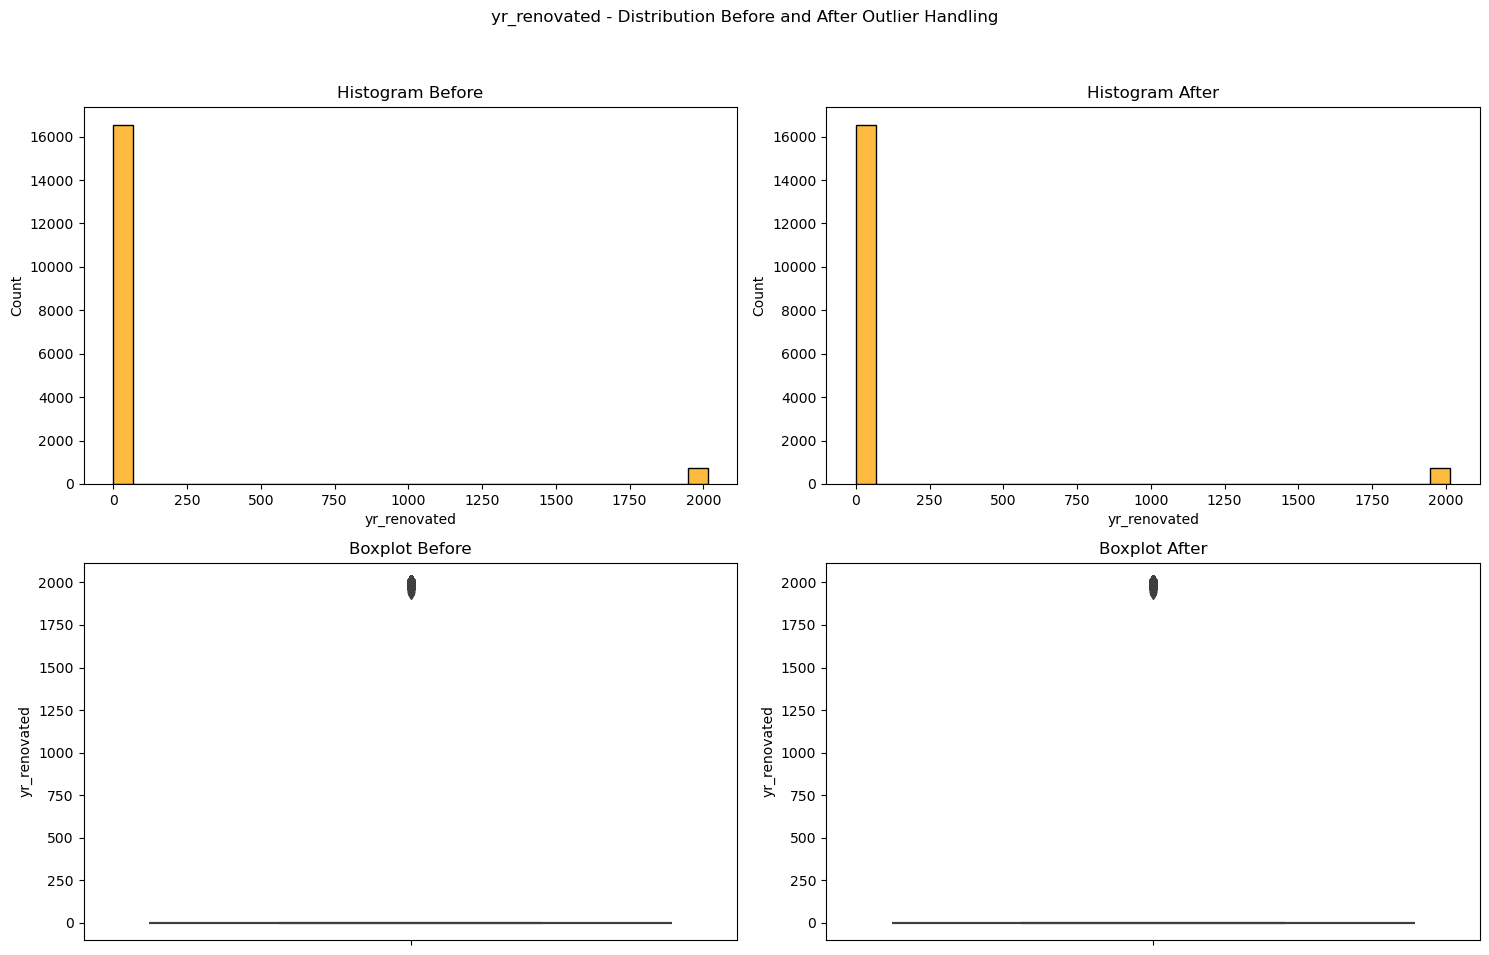

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


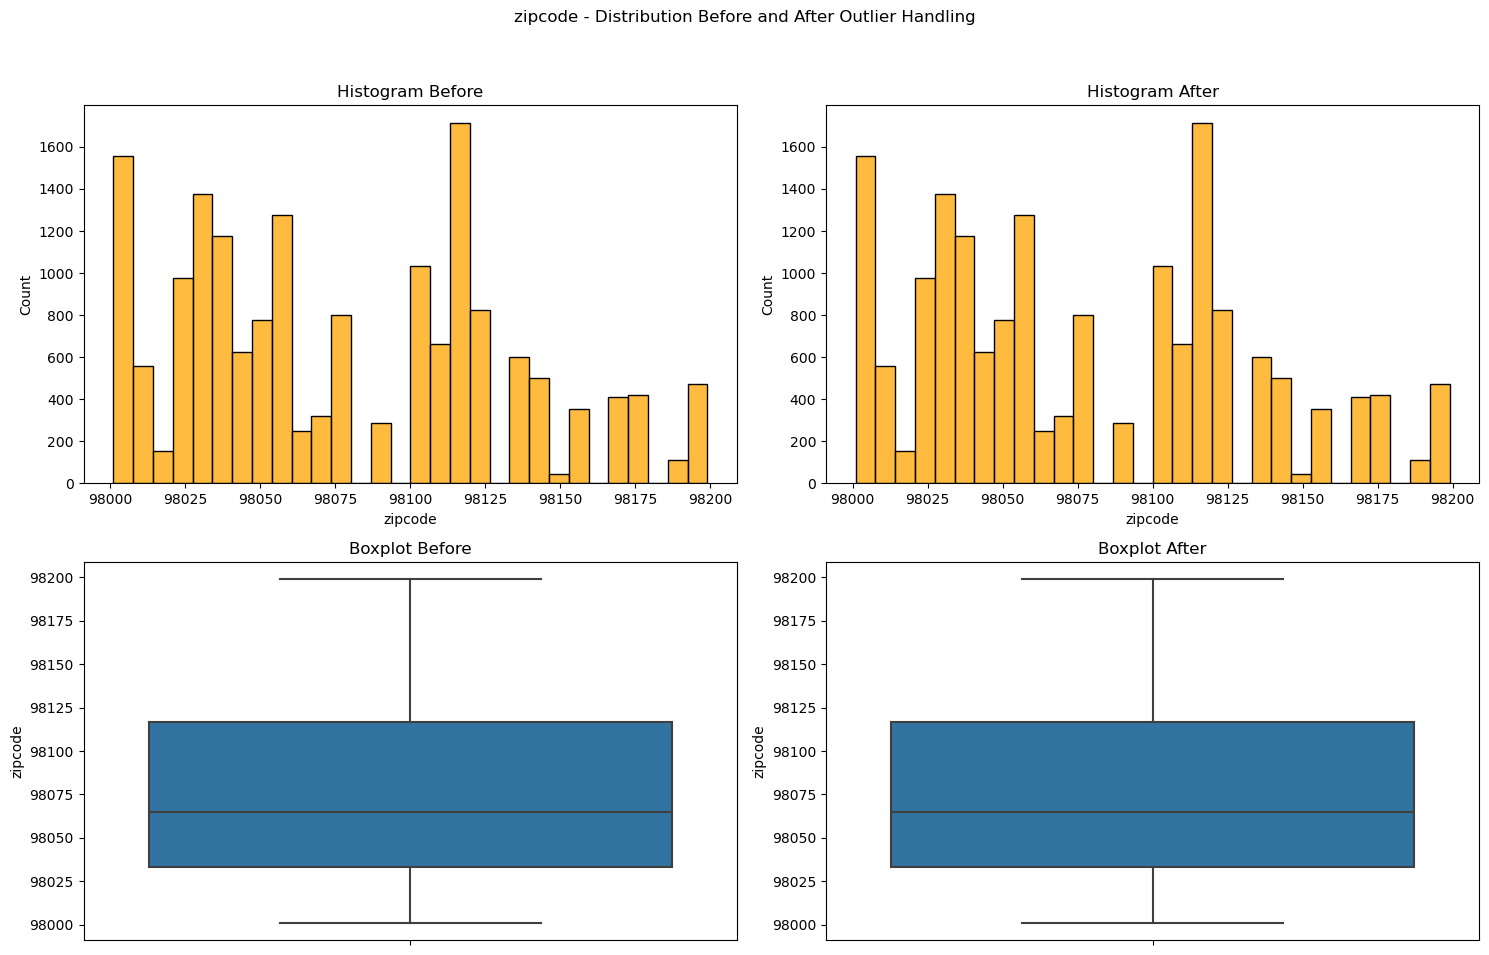

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


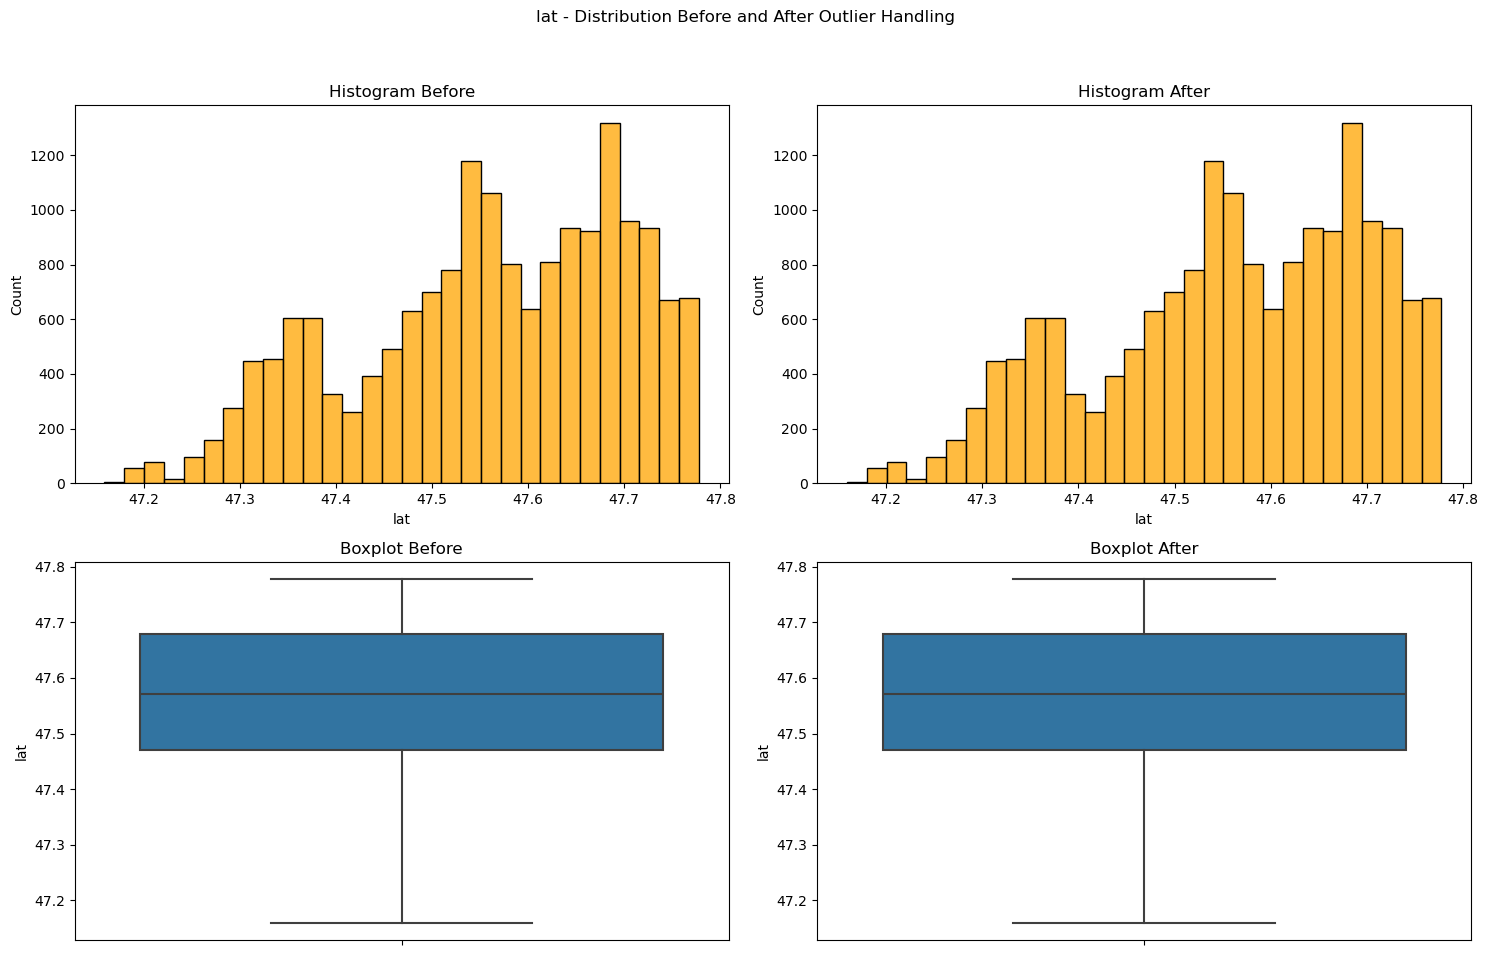

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


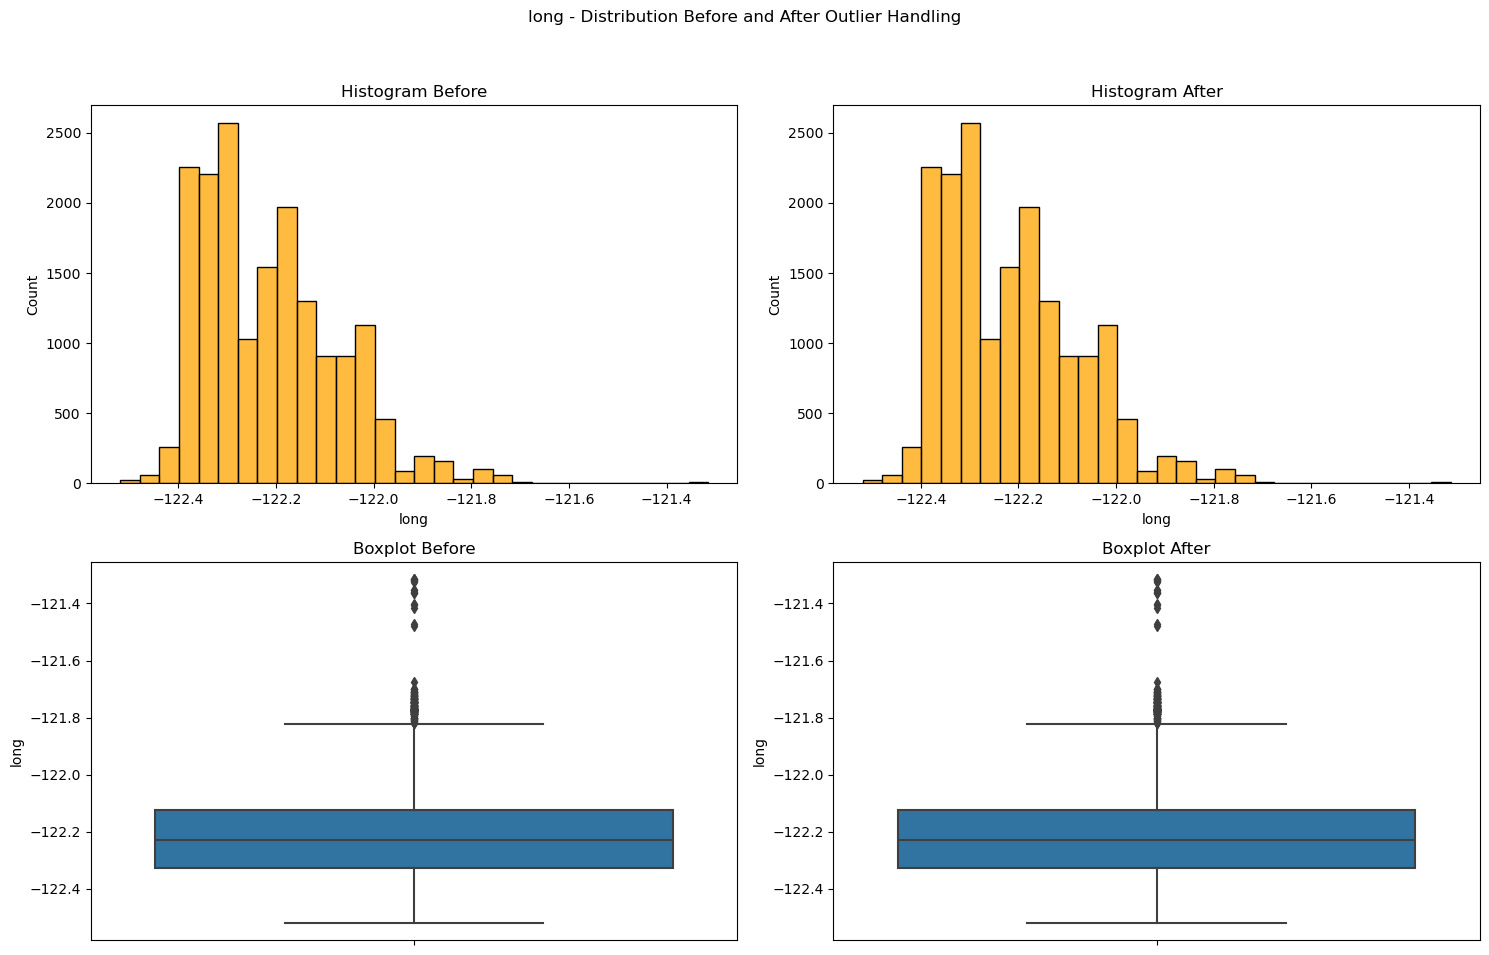

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


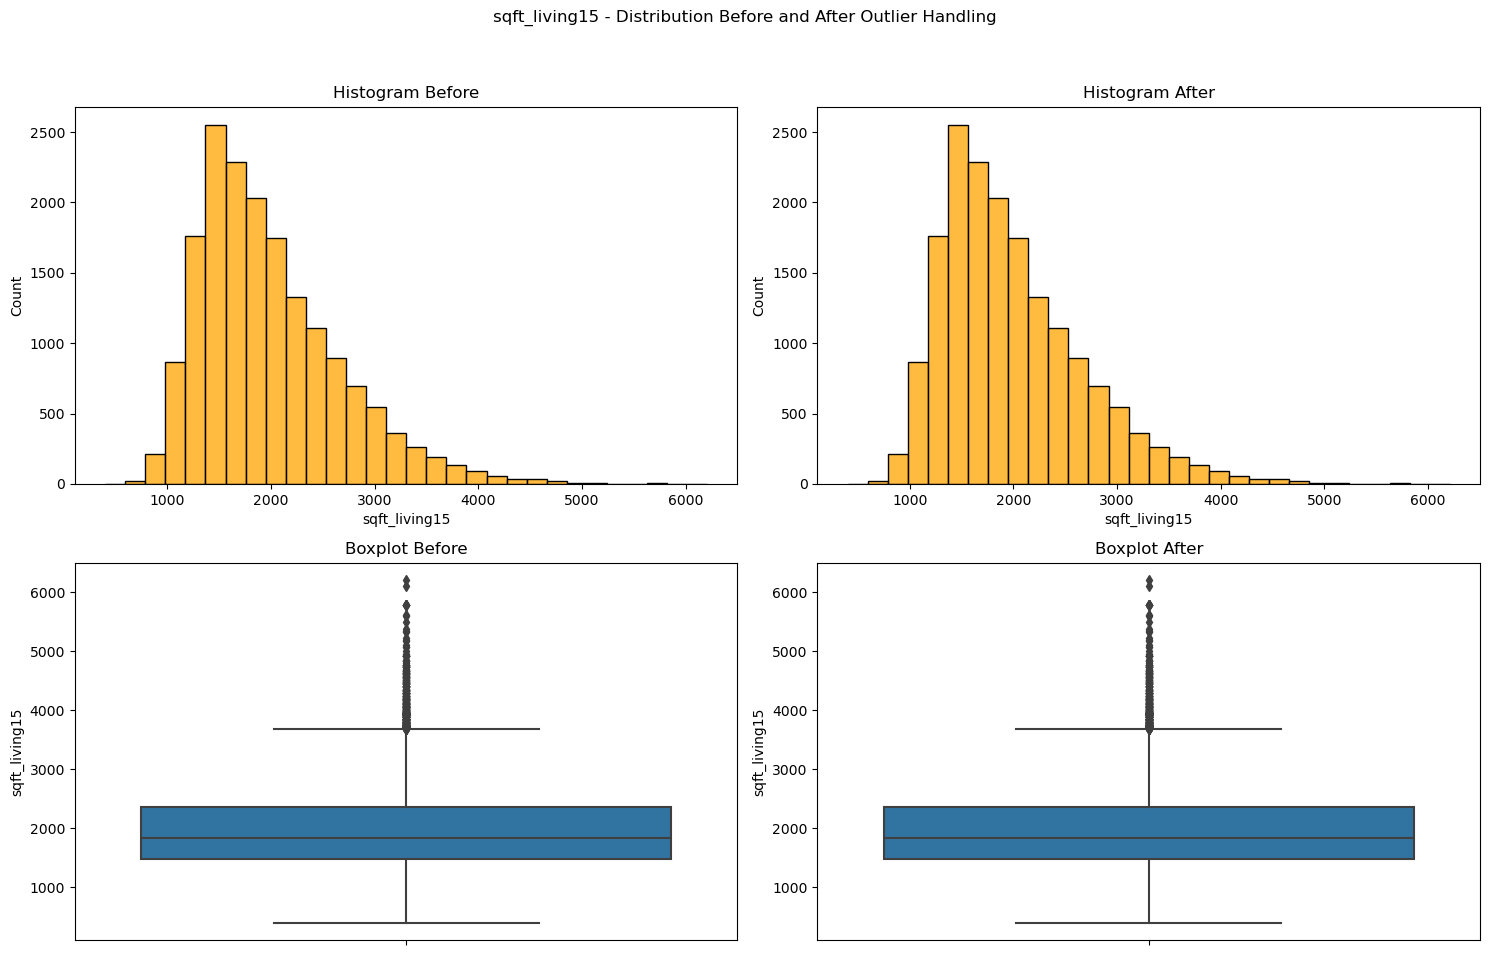

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


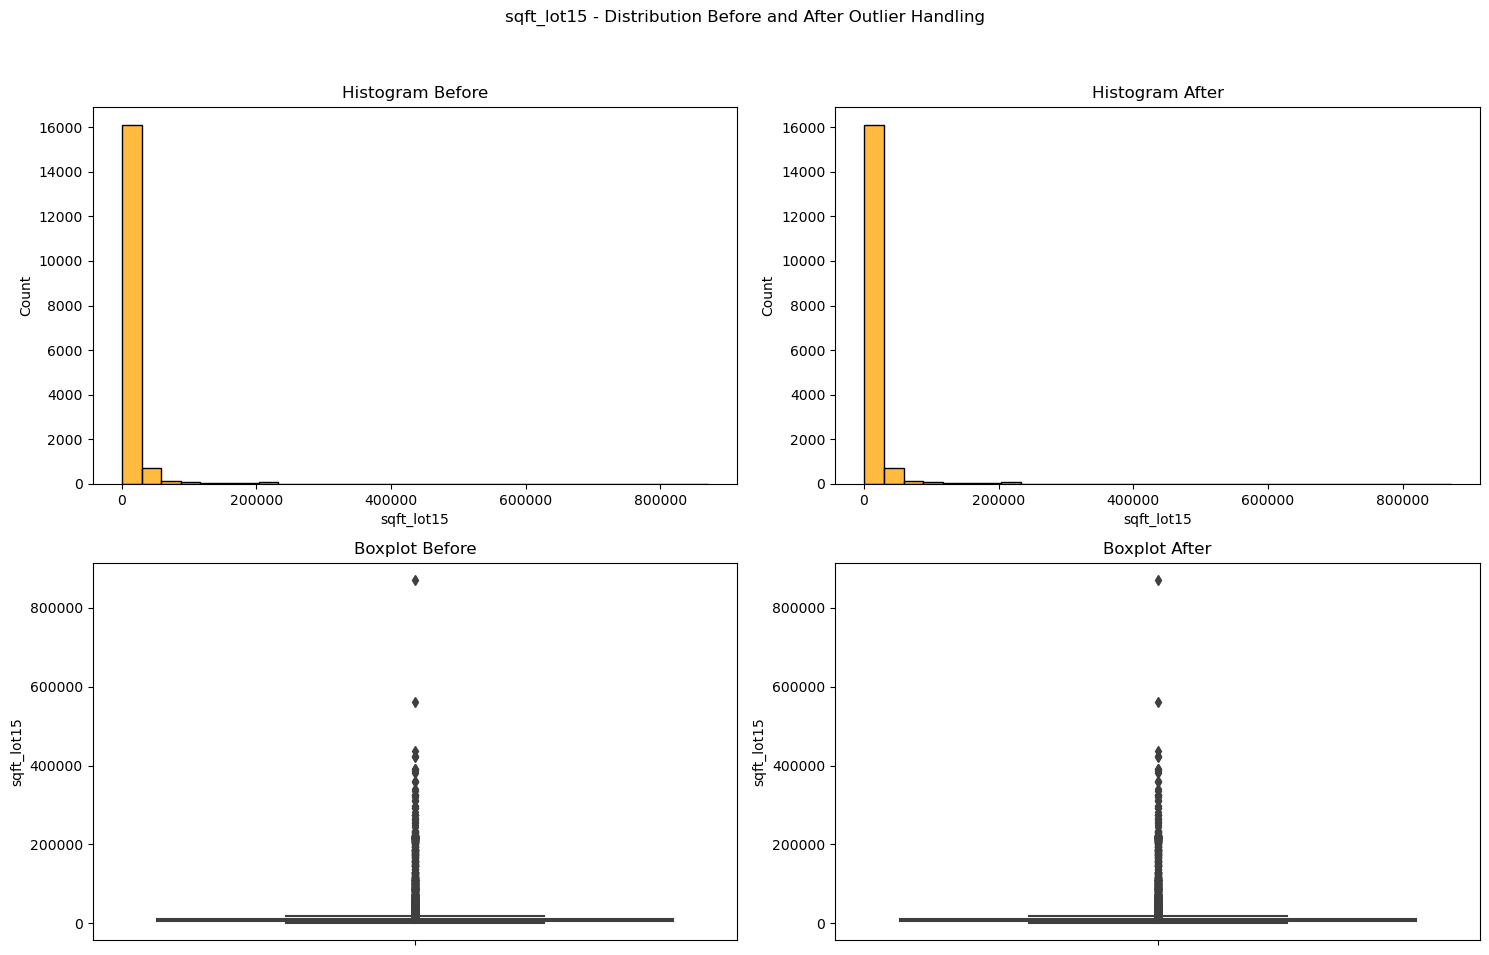

In [25]:
for num in num_val:
    outlier_handling_comparison(X_train, X_train_capped, num)

Based on the graph that are shown above, there are not a big difference before and after handling outliers, but there seems to be quite the number of extreme values. Which is why later on we will use robust scaler to scale the numerical columns. Since robust scaler is not sensitive to outliers and the data have outliers, I think the robust scaler would be suitable to use.

### Feature Engineering

In [26]:
#Differenciating categorical columns and numerical columns
numColumns = X_train_capped.select_dtypes(include=['int64', 'float64']).columns.tolist()
catColumns = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()

print(numColumns)
print(catColumns)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
[]


Over here, we could all see that all of the columns are considered as numerical values. All of these data types are either integer or float. Even though all of these are considered numerical, some of them are encoded categorical values and we have seen on the data loading part before. Which means, later on we don't have to divide the data to numerical and categorical value and can skip the encoding part. 

In [27]:
#Check for empty columns
X_train_capped.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Here we can see that there are no missing value, so we don't have to drop any entries nor input any entries with certain value. We then can continue to the next part.

In [28]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_capped.columns:
  if abs(X_train_capped[col].skew()) < 0.5:
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_capped[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_capped[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,bedrooms,0.343006,0.000000e+00,Significant
1,bathrooms,0.502473,0.000000e+00,Significant
2,sqft_living,0.642794,0.000000e+00,Significant
3,sqft_lot,0.078720,3.528356e-25,Significant
4,floors,0.316042,0.000000e+00,Significant
5,waterfront,0.117155,6.764160e-54,Significant
6,view,0.289108,0.000000e+00,Significant
7,condition,0.018891,1.298918e-02,Significant
8,grade,0.656464,0.000000e+00,Significant
9,sqft_above,0.539468,0.000000e+00,Significant


Over here we see that all of the columns left are significantly correlated in predicting the price of the housing sales. Therefore, we will continue using all of these columns for the model. Correlation columns are important in predicting the price. Without these data the price would've not been accurate.

In [29]:
#Redefine the columns to be used
X_train_final = X_train_capped[selected_num_cols]

X_test_final = X_test_capped[selected_num_cols]

#Check data that has been updated
print(X_train_final.tail())

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
21194         4       2.50         2301      6452     2.0           0     0   
5199          3       2.00         1780      9732     1.0           0     0   
18125         3       2.50         1600      3580     2.0           0     0   
8243          4       2.75         2660      7389     2.0           0     0   
8823          2       2.00         1280      4095     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
21194          3      9        2301              0      2010             0   
5199           3      8        1780              0      1967             0   
18125          3      7        1600              0      2000             0   
8243           3      9        2660              0      2002             0   
8823           4      8        1280              0      1918             0   

       zipcode      lat     long  sqft_living15  sqft_lo

The selected columns are inputted into the variable that are going to be used for the model. These are the examples of the data that are going to be use to predict the price.

### Scaling

In [30]:
# Initialize scaler
scaler = RobustScaler()

#Fit and fit-transform the train and test data
X_train_num_scaled = scaler.fit_transform(X_train_final)
X_test_num_scaled = scaler.transform(X_test_final)

#Check data
X_train_num_scaled

array([[ 0.        , -0.33333333, -0.45132743, ..., -1.11330049,
         0.63636364,  9.82370333],
       [ 1.        ,  1.        ,  0.56637168, ..., -0.67980296,
        -0.27272727, -0.62440491],
       [ 1.        ,  1.        ,  1.07964602, ..., -0.42857143,
         1.23863636, -0.62540717],
       ...,
       [ 0.        ,  0.33333333, -0.27433628, ..., -0.15763547,
         0.21590909, -0.66008519],
       [ 1.        ,  0.66666667,  0.66371681, ...,  1.24137931,
         1.125     , -0.04650464],
       [-1.        , -0.33333333, -0.55752212, ..., -0.80788177,
        -0.40909091, -0.42495615]])

After we have define the columns that are going to be used for the model, the data that are numerical, which are all are going to be scaled for a clearer prediction outcome. Robust scaling is used because its non-sensitive characteristic to outliers as it is resistant to it.

# E. Model Definition

The models that are going to be used are:

1. Linear Regression is the most basic and most commonly used predictive analysis. It is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. From this data, we might think that the the features might actually be in a linear relationship with the price. Therefore, we will be using the linear regression model.

2. Decision Tree is a non-linear model that splits the data into subsets based on feature values, creating a tree-like structure. The predictions will be made by decision rule from the features. This model is used, because the easy interpretation and to see if the features is in a non-linear relationship with the price.

3. Random Forest Regressor is an ensemble method that combines multiple decision trees to produce a robust and more accurate model. Each tree will be trained on a random subset data and averaging predictions from all of the trees will be the final prediction. We will be using this model because we want an accurate model that can handle non-linear relationships and avoid overfitting.

4. Support Vector Machine fits the data points in a regression model. It uses kernel functions to project data into higher dimensions. We will be using this model if the data has a non-linear relationships and handle overfitting well.

5.  Ridge Regression is a machine learning model that helps to prevent overfitting by adding a penalty to the size of the coefficients. We will be using this model to overcome concerns about overfitting, because it has quite a large number of features, and  we want to improve the generalizability and interpretability of your model.


# F. Model Trainning

### Linear Regression

In [31]:
#Initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train_final, y_train)

LinearRegression()

We initialize and fit the first base model, which is linear regression. We will check with other evaluation metrics to see how well suited is the data with the model.

### Support Vector Machine (SVM)

In [34]:
#Initialize SVM
svm = SVR(C=1.0, kernel='rbf', gamma='scale')

# Train the SVM model
svm.fit(X_train_final, y_train)

SVR()

We will initialize the second model which is svm with parmeters of c (1.0), rbf kernel, and scale gamma. Which will be then fit onto the data to predict the price value. The model will be evaluated later to see if the data is suitable to be predicted with this model.

### Decision Tree Regressor

In [35]:
#Initialize and fit decision tree regressor
dtr = DecisionTreeRegressor(max_depth=4, random_state=10)
dtr.fit(X_train_final, y_train)

DecisionTreeRegressor(max_depth=4, random_state=10)

The third model to be initialized is the decision tree regressor model with the parameter of 4 max depth and lock the random state to 10. This model will be evaluated later to check if the data is suitable to be predicted with this model.

### Ridge Regression

In [36]:
#Initialize and fit polynomial regression
r = Ridge()
r.fit(X_train_final, y_train)

Ridge()

The fourth model that is initialized is the naive bayes. It is fit to the data and will be use to predict the price value. The model will be evaluated later on to see how suitable is it for the data.

### Random Forest

In [37]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42)

rf.fit(X_train_final, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

The last model that is initialized is the random forest with the parameter of 100 n_estimators, 5 max depth, and lock the random state to 42. The data is fit to this model. It will also be evaluated to see how well and suitable is the data with the model.

# G. Model Evaluation

### Linear Regression

In [38]:
# Predict Train-Set and Test-Set
y_pred_train_lr = lr.predict(X_train_final)
y_pred_test_lr = lr.predict(X_test_final)

First, we will check how well the linear regression model are. We put the prediction from the model linear regression onto a variable. Which will be checked with evaluation metrics.

In [39]:
# Model evaluation using different metrics

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_lr))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_lr))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_lr))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_lr))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_lr, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_lr, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_lr))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_lr))
print('')

MAE - Train Set  :  125357.38822245976
MAE - Test Set   :  128154.22892344352

MSE - Train Set  :  40492699429.433914
MSE - Test Set   :  41441142475.121765

RMSE - Train Set :  201227.9787440949
RMSE - Test Set  :  203570.97650480966

R2 Score - Train Set :  0.6984415097886023
R2 Score - Test Set  :  0.6969391880015585



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We will see the MAE and R2 score. Based on the evaluation metrics MAE, the results of the train data prediction seems to be about 125000 off from the real results. While the test data prediction is about 128000 off from the real results (USD). Based on the R2 score, 69% of the data can be explain by the model. This model prediction for the train and test set isn't to far off each other. That means that the model isn't just memorizing the train data, but is learning the pattern. It is also reliable since the score is stable. There are underlying complexities in the data that aren't captured well by the linear regression model. This model found moderate amount of variance in the data that suggests that while the model is not perfect, but captures a significant portion of the variation in the target variable.

### Support Vector Machine (SVM)

In [40]:
# Predict Train-Set and Test-Set
y_pred_train_svm = svm.predict(X_train_final)
y_pred_test_svm = svm.predict(X_test_final)

The second base model that we will check is SVM. The prediction will be saved onto 2 variables for train and test set. We will check it with evaluation metrics.

In [41]:
# Model evaluation using different metrics

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_svm))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_svm))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_svm))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_svm))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_svm, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_svm, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_svm))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_svm))

MAE - Train Set  :  221037.15006728235
MAE - Test Set   :  224881.48351354283

MSE - Train Set  :  142175130545.0009
MSE - Test Set   :  145688369913.993

RMSE - Train Set :  377061.1761306126
RMSE - Test Set  :  381691.4590529804

R2 Score - Train Set :  -0.05881105277940257
R2 Score - Test Set  :  -0.06542515596354348


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We will check with the MAE and R2 Score specificly for this. Based on what was shown, the MAE score shows that the train set prediction is about 221000 off from the actual results and 225000 off from the real results (USD). The R2 score has a negative value with -0.05 for the train set and -0.06 for the test set. This indicates that the model isn't fitting well with the data at all and has significant error. The model is not capturing any meaningful relationship between the features and the target variable and the model's predictions are not explaining or predicting the variability. This also proves that the model can't explain the variance well due to the underfitting and poor choice of model.

### Decision Tree Regressor

In [42]:
# Predict Train-Set and Test-Set
y_pred_train_dtr = dtr.predict(X_train_final)
y_pred_test_dtr = dtr.predict(X_test_final)

Third, we will check the next model, which is decision tree regressor model. The prediction is saved onto 2 variables for train and test set. It will then be checked with evaluation metrics.

In [43]:
# Model evaluation using different metrics

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_dtr))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_dtr))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_dtr))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_dtr))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_dtr, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_dtr, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_dtr))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_dtr))

MAE - Train Set  :  124326.0379472782
MAE - Test Set   :  128638.0620184101

MSE - Train Set  :  42823020718.96582
MSE - Test Set   :  51564022574.35762

RMSE - Train Set :  206937.23859896706
RMSE - Test Set  :  227077.12913095765

R2 Score - Train Set :  0.6810870686256132
R2 Score - Test Set  :  0.6229101415176448


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We will specifically check the MAE and R2 Score for this data. The MAE score for the train set prediction is about 124000 off of the real results and 128000 off of the real results (USD). The R2 Score shows that 68% of the train data can be explain by the decision tree regressor model and 62% of the test data can be explain by this model. This indicates that the model captures a significant portion of the patterns in the training data, but it performs slightly worse on new, unseen data compared to the training data. The scores are reasonably high meaning that it can explain the variability of the data. The score drops slightly, indicating a slight overfitting. The slight overfit still understandable, could still be used well if we wanted to.

### Ridge Regression

In [44]:
# Predict Train-Set and Test-Set
y_pred_train_r = r.predict(X_train_final)
y_pred_test_r = r.predict(X_test_final)

The fourth model that we will check with evaluation metrics is ridge. The prediction will be saved onto 2 different variables for train and test set.

In [45]:
# Model evaluation using different metrics

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_r))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_r))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_r))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_r))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_r, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_r, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_r))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_r))

MAE - Train Set  :  125340.04536185325
MAE - Test Set   :  128133.50571459503

MSE - Train Set  :  40492983828.75279
MSE - Test Set   :  41433719025.56986

RMSE - Train Set :  201228.6854023372
RMSE - Test Set  :  203552.74261372618

R2 Score - Train Set :  0.6984393918011521
R2 Score - Test Set  :  0.6969934759992984


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We specifically look at the MAE and R2 score. The MAE score shows that the prediction for the train data is about 125000 off from the real results and the test set prediction is about 128000 off from the real results. Based on the R2 score, about 69% of the train data can be explain from this model and 69% of the test set prediction can be explained. This means that the model performance is consistent throughout the trainning and test set. For futher improvement, this model needs varied examples data to learn better generalization to different patterns. The model has a very slight overfitting, this is proven from the MAE score that has about 2000 USD difference. The model is generalizing well and not overfitting excessively. The results may be somewhat accurate, but we will still see the other model performance. 

### Random Forest

In [46]:
# Predict Train-Set and Test-Set
y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf = rf.predict(X_test_final)

Lastly we will check the last model which random forest. The predictions are saved into 2 different variables for train and test set predictions. We will see how well the model performs with evaluation metrics.

In [47]:
# Model evaluation using different metrics

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_rf))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_rf))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train_rf))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test_rf))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_rf, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_rf, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train_rf))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test_rf))

MAE - Train Set  :  100430.16930219324
MAE - Test Set   :  104061.56166943749

MSE - Train Set  :  26928739576.820827
MSE - Test Set   :  31065114859.899815

RMSE - Train Set :  164099.78542588296
RMSE - Test Set  :  176252.9853928716

R2 Score - Train Set :  0.7994554533408265
R2 Score - Test Set  :  0.7728195128809989


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


For time saving, we will look at the MAE and R2 score specifically. The MAE score shows that about 100000 of the train set prediction is off from the actual results and about 104000 test set prediction is off from the actual results. Based on the R2 Score, the model can explain 79% of the data from the train set and 77% of the test set. The model has a strong fit on the training data, capturing most of the variability and also performs well on the test data. The score indicates that the model generalized well to the unforeseen data. This also means that the data is reliable and stable in predicting the results, therefore we can trust this model to predict newer data.

With all the evaluation, it is determined that the random forest regressor is the most suitable model to be use to predict this price data. Therefore, we will proceed to use the random forest regresssor model.

### Pipeline with Hyperparameter Tuning

In [48]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_score = best_model.score(X_test, y_test)
print("Test set score (R^2): ", test_score)
print("Test set Mean Squared Error: ", test_mse)

# Perform cross-validation on the training data
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores (negative MSE):", cv_scores)
print("Mean cross-validation score (negative MSE):", np.mean(cv_scores))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   6.8s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   6.9s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   7.0s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   7.0s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time=   7.4s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  13.5s
[CV] END regressor__max_depth=None, regressor__min_samples_l

Based on the grid search, random forest with the hyperparameter of 'regressor__max_depth': 30, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50 works the best for this data. Max depth means setting a maximum depth limits the number of levels in each decision tree to 30, minimum number of samples required to be at a leaf node is 1, minimum number of samples required to split an internal node is 2, and the number of trees in the forest is 50.

The cross validation score is a negative MSE of approximately -17663346707.221138. This low negative MSE indicates better performance.

The R2 score shows a 87% of performance indicating a good fit from the model. 

We see the error of the model prediction through the MSE score, which shows average squared difference between the predicted values and the actual values. This model has an error MSE 16428791641.999588. 

Individual scores obtained from each fold of cross-validation here shows -2.11339147e+10 -1.81468149e+10 -1.42004898e+10 -1.89191593e+10
 -2.09558861e+10. The more negative MSE values indicates better performance. Which means this model have good performance since the negative value are quite large.

The mean cross-validation score shows-18671252955.511097 is an overall measure of model performance across different folds of the data. This confirms the model's effectiveness in predicting the target variable.

The random forest regressor model with this parameters demonstrates a strong predictive power and appears to generalize well to unseen data. It is proven from the cross validation results as both train set and test set are similar. The excellent performance metrics across various evaluation criteria suggest that this model is recommended to use and is suitable to our data.

In [49]:
# Define random forest regessor and fit
rf = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

rf.fit(X_test_final, y_test)

RandomForestRegressor(n_estimators=200)

This part we will redefine the random forest regressor for the model inference. This model, random forest regressor with parmeters of max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 will be the final decision we made. 

# H. Model Saving

In [50]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(selected_num_cols, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model.pkl', 'wb') as file_3:
  pickle.dump(rf, file_3)

# I. Conclusion

### Conceptual Problems

1. Bagging is an ensemble machine learning technique to improve the stability and accuracy of machine learning algorithms by reducing their variability or variance. This technique is particularly useful for models that tend to overfit, such as decision trees. It works by creating samples, which is multiple subsets by randomly sampling. It may be the same size as the original data with duplicates. The model will be trainned afterwards. Lastly, in regression the average prediction will be made from all the models and in classification there will be majority voting to determine the final class.

2. Random Forest works by sampling, creating multiple random samples with replacement from the dataset. Then building decision Trees, where each sample is used to build decision trees to predict numeric values. Next step is feature selection, each tree considers a random subset of features at each split. Last is aggregating predictions, predictions from all trees are averaged to produce the final regression prediction.

3. Cross validation is a statistical technique in machine learning to evaluate the performance and generalizability of a model. It partitions the data into subsets, training the model on the training set, and testing it on the validation set. The process will be repeated multiple times until the model performance is consistent and not dependent on any particular division of the data.

### Conclusion

First ofa all we will import all of the libraries that we want to use. Then we will load the data. The data have 21 columns with 21613 entries. The data have integer and float data types which are considered numerical. There is no missing value present in the data which means that the missing value handling can be skipped. Later on we drop the id and date column because it is unnecessary in predicting the price.

Then, we explored the data by analyzing with graph and chart. We see that 45% of the sales are 3 bedroom houses. This explains that most people prefer 3 bedroom houses. The data also shows that 38% of the sales are 2 story houses. Most of the sales seems to be houses with 1-2 floors. Mainly the houses on the sales are 2.5 bathrooms with 25%. Most people here prefers 1 to 2.5 bathrooms. The sales also shows that 90% of the houses doesn't have a good view. Which means that the buyers doesn't prioritize view, but rather functionality. The most on demand houses are the ones with about 2000 sqft building. The data also shows that people here prefer recently built houses, over 2000s.

Next, the data are split into features that determines the prices and the price which is the target itself. The data outliers needs to be handled. Therefore, we will differenciate the numerical columns with the categorical columns. It turns out that all columns are numerical columns. We will check their skewness and handle the outliers according to it. The normally distributed columns are handled with gaussian capping method and the skewed columns are handled with iqr capping method. We see from the graph, that there aren't a big difference in begore and after handling the outliers. Since the data are all numerical, so we only need to scale all the columns. 

Next part is to test different models, the models are fitted to the features and target. First, we checked the linear regression model. The prediction shows that the performance is about 69% for both train and test data. There seems not too far off each other, which indicates stability and reliability in the model. Second, is SVM. The models seems to not be fitting well from the negative score that we see. This might be because the train data doesn't capture meaningful relationship between features and target data and so the variability in predicting is not explained well. Third, decision tree regressor model. The performance drops slightly from the train set to the test set. It indicates the overfitting of the model. The train data from this model might not cover the unseen data in the test set. To improve this model, the data in the train set needs to be more variative. Fourth, ridge regression. The score shows that the model is consistent troughout the train and test set. To improve, this model needs varied examples for a better generalization. Last model is random forest. This model proves to be the best one with score performance of 79% in train set and 77% in test set. The data generalizes well to the unseen data in the test set. The model is proven reliable and stable in predicting results, despite the slight overfitting. The score shows us that we could trust this model in predicting the price.

We also checked the best parameters using pipeline and the grid search hyperparameter tuning. The result shows that random forest with the hyperparameter of 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200 works the best. The cross validation score shows negative value, which means a ood performance. The r2 score shows an 88% indicating a good fit of the data with the model. The MSE score shows that the average squared error is approximately 15.8 billion. With the type of price we are predicting, it is not too much of an error. Each fold of cross-validation shows negative value, but it iis a good indicator that the model done well. The mean cross-validation score shows -18306954260.98501 is an overall measure of model performance across different folds of the data. This confirms the model efectiveness in the prediction.

### Recommendations

#### **Technique** 

With this experiment, I can say that the best model to use in predicting the price of house sales is random forest regressor with 'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200 hyperparameters. The model performs 88% well. 

This model is great for this data because it provides higher accuracy compared to decision tree, which only has 1 tree. It can capture non-linear relationships between features and target variables. Due to combining multiple trees, the model generalize well and is less prone to overfitting. It also ranks the importance of features, which helps in feature selection. The model can handle missing value in the dataset.

Though, the model trainning computation is quite time consuming especially in large dataset and large number of trees. It is also harder to interpret compare to a single tree model. The model also requires more memory usage due to the number of trees.

By carefully tuning parameters, optimizing features, and considering ensemble methods, you can leverage the strengths of random forests while reducing some of its downside to achieve better performance in regression tasks.

#### **Business**

By creating this model to predict housing price, we can implement strategies such as:

1. Targeted Marketing and Sales: The model will identify areas where housing prices are predicted to rise and we could held marketing campaigns with personalized offers to potential buyers in those areas.

2. Investment and Development: We cold acquire land or properties in regions where the model expect the housing price rise to develop houses or resale at a higher price. Also, adjust insurance premiums and mortgage lending rates based on market trends with downturns or areas with stagnant growth for investment strategy.

3. Pricing Strategies: To adjust the price of houses appropriately according to market condition as to stay competitive and maximize profit margins by using this model.

4. Inventory Management: Managing property inventories by optimizing the timing of property sales where market peaks to align supply with demand based on trends.

5. Customer Insights: With this model, we could understand customers preferences to offer realistic price.

6. Partnership and Alliances: We could form strategic partnership with builders and developers, collaborate with real estate agents, and mortgage lenders to create projects in high-growth areas by offering bundled services based on market predictions.

7. Innovation and Technology: Appealing to tech-savvy and environmentally conscious buyers with smart home technology and sustainable and energy-efficient building practices in high-demand and increasing housing price areas.